In [ ]:
import zipfile
import pandas as pd
import polars as pl
import geopandas as gpd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import re
import pycountry
import geodata
from tqdm import tqdm
from zipfile import ZipFile
from geopy.geocoders import Nominatim
import time
import urllib.request
import pycountry
from google.colab import files
import matplotlib.pyplot as plt
import contextily as ctx
import fiona
import tools
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import unicodedata
import pickle
import osmnx as ox
from concurrent.futures import ThreadPoolExecutor, as_completed
from shapely.geometry import Point
from matplotlib.ticker import MaxNLocator
import pandas as pd
import numpy as np
from itertools import product

In [ ]:
FONTSIZE = 18
params = {
         'axes.labelsize': FONTSIZE,
         'axes.titlesize': FONTSIZE,
         'xtick.labelsize':FONTSIZE,
         'legend.fontsize':FONTSIZE,
         'ytick.labelsize':FONTSIZE}

plt.rcParams.update(params)

image_folder = '/content/Linking-Plastic-to-Dengue-Incidence/plots'
data_folder = '/content/Linking-Plastic-to-Dengue-Incidence/data'
os.makedirs(image_folder, exist_ok=True)
os.makedirs(data_folder, exist_ok=True)

## GADM DATA

In [ ]:
# !wget -P "/content/data/GADM" "https://geodata.ucdavis.edu/gadm/gadm4.1/gadm_410-levels.zip"
# with zipfile.ZipFile("/content/data/GADM/gadm_410-levels.zip", 'r') as file:
#     file.extractall("/content/data/GADM/")

In [ ]:
# !wget -P "/content/data/GADM/New" "https://geodata.ucdavis.edu/gadm/gadm4.1/gadm_410-gpkg.zip"
# with zipfile.ZipFile("/content/data/GADM/New/gadm_410-gpkg.zip", 'r') as file:
#     file.extractall("/content/data/GADM/New/")

In [ ]:
# Define the path to your GeoPackage file
gadm_layers_path = "/content/data/GADM/gadm_410-levels.gpkg"

# List all available layers in the GeoPackage file
layers = fiona.listlayers(gadm_layers_path)

print("Available layers:", layers)

Available layers: ['ADM_0', 'ADM_1', 'ADM_2', 'ADM_3', 'ADM_4', 'ADM_5']


In [ ]:
# # Define the path to your GeoPackage file
# gadm_layers_path = "/content/data/GADM/New/gadm_410-levels.gpkg"

# # List all available layers in the GeoPackage file
# layers = fiona.listlayers(gadm_layers_path)

# print("Available layers:", layers)

In [ ]:
# Read a specific layer from the GeoPackage
adm2 = gpd.read_file(gadm_layers_path, layer="ADM_2")
# adm1 = gpd.read_file(gadm_layers_path, layer="ADM_1")
adm2.head()

,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.1_1,Baharak,NA,NA,Wuleswali,District,NA,AF.BD.BA,"MULTIPOLYGON (((71.41149 36.55717, 71.40954 36.55237, 71.39558 36.55453, 71.37395 36.55474, 71.36436 36.55226, 71.33878 36.54087, 71.31843 36.53446, 71.3019 36.52355, 71.28774 36.52113, 71.28183 36.51721, 71.27996 36.50762, 71.27595 36.49977, 71.26816 36.49425, 71.25977 36.48325, 71.24686 36.477..."
1,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.2_1,Darwaz,NA,NA,Wuleswali,District,NA,AF.BD.DA,"MULTIPOLYGON (((71.2762 38.00465, 71.27578 38.00471, 71.26561 38.006, 71.25725 38.00993, 71.25337 38.01428, 71.22517 38.01237, 71.20536 38.01511, 71.19342 38.01883, 71.18879 38.02218, 71.17726 38.02659, 71.17789 38.03534, 71.17218 38.03826, 71.16567 38.03322, 71.16112 38.02494, 71.15066 38.01851..."
2,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.3_1,Fayzabad,NA,NA,Wuleswali,District,NA,AF.BD.FA,"MULTIPOLYGON (((70.78272 37.27678, 70.78635 37.27388, 70.78971 37.2621, 70.80228 37.25319, 70.8114 37.23973, 70.81562 37.22918, 70.82764 37.21746, 70.82961 37.2114, 70.83652 37.20805, 70.84901 37.20512, 70.85266 37.20191, 70.85607 37.19467, 70.86687 37.18637, 70.86703 37.17764, 70.86312 37.17139..."
3,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.4_1,Ishkashim,NA,NA,Wuleswali,District,NA,AF.BD.IK,"MULTIPOLYGON (((71.41149 36.55717, 71.40091 36.56163, 71.38696 36.56464, 71.37926 36.56792, 71.37269 36.57288, 71.36969 36.57661, 71.3614 36.58263, 71.34565 36.58645, 71.31833 36.60307, 71.29496 36.61458, 71.28579 36.62202, 71.26329 36.64516, 71.24262 36.65906, 71.23598 36.66879, 71.23112 36.672..."
4,AFG,Afghanistan,AFG.1_1,Badakhshan,NA,AFG.1.5_1,Jurm,NA,NA,Wuleswali,District,NA,AF.BD.JU,"MULTIPOLYGON (((70.71236 37.07621, 70.73582 37.06548, 70.75385 37.05461, 70.76669 37.0419, 70.78426 37.02771, 70.79385 37.01539, 70.8073 37.00198, 70.83394 36.98849, 70.85869 36.96816, 70.89158 36.95346, 70.89722 36.95274, 70.90235 36.94965, 70.95702 36.93212, 70.97681 36.91793, 70.99757 36.9066..."


In [ ]:
adm2[adm2.COUNTRY=="Brazil"].head()

,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
2879,BRA,Brazil,BRA.1_1,Acre,NA,BRA.1.1_2,Acrelândia,NA,NA,Município,Municipality,1200013,NA,"MULTIPOLYGON (((-67.00087 -10.22907, -67.00163 -10.22934, -67.00228 -10.22956, -67.00228 -10.22765, -67.00228 -10.22754, -67.00233 -10.21706, -67.00239 -10.20225, -67.038 -10.20234, -67.07071 -10.20243, -67.07596 -10.20242, -67.07582 -10.1919, -67.07591 -10.1764, -67.07599 -10.16298, -67.07594 -..."
2880,BRA,Brazil,BRA.1_1,Acre,NA,BRA.1.2_2,Assis Brasil,NA,NA,Município,Municipality,1200054,NA,"MULTIPOLYGON (((-69.57415 -10.94523, -69.57451 -10.94488, -69.57638 -10.94181, -69.57685 -10.94149, -69.57699 -10.9414, -69.57932 -10.94077, -69.58208 -10.94034, -69.58299 -10.94033, -69.58547 -10.94031, -69.58756 -10.94029, -69.58846 -10.94078, -69.58842 -10.9414, -69.58807 -10.94204, -69.58631..."
2881,BRA,Brazil,BRA.1_1,Acre,NA,BRA.1.3_2,Brasiléia,NA,NA,Município,Municipality,1200104,NA,"MULTIPOLYGON (((-69.41283 -10.93708, -69.41289 -10.93715, -69.4141 -10.93875, -69.41679 -10.92746, -69.42356 -10.92717, -69.42315 -10.92654, -69.42314 -10.92652, -69.42335 -10.9266, -69.42351 -10.92664, -69.42352 -10.92627, -69.42344 -10.92599, -69.42315 -10.92569, -69.42308 -10.92473, -69.42296..."
2882,BRA,Brazil,BRA.1_1,Acre,NA,BRA.1.4_2,Bujari,NA,NA,Município,Municipality,1200138,NA,"MULTIPOLYGON (((-67.97684 -9.35273, -67.97684 -9.35274, -67.97683 -9.35278, -67.97678 -9.353, -67.97678 -9.35324, -67.9769 -9.35355, -67.97714 -9.35382, -67.9773 -9.35396, -67.97747 -9.3541, -67.97778 -9.35429, -67.97804 -9.35438, -67.97821 -9.35439, -67.97835 -9.35434, -67.97859 -9.35428, -67.9..."
2883,BRA,Brazil,BRA.1_1,Acre,NA,BRA.1.5_2,Capixaba,NA,NA,Município,Municipality,1200179,NA,"MULTIPOLYGON (((-67.57861 -10.50274, -67.57927 -10.50293, -67.57869 -10.50232, -67.57835 -10.5022, -67.57798 -10.5023, -67.57771 -10.50249, -67.57861 -10.50274)), ((-67.72929 -10.71256, -67.72948 -10.71244, -67.72983 -10.71209, -67.73 -10.71184, -67.73007 -10.71159, -67.73008 -10.71129, -67.7299..."


In [ ]:
# Count NaNs for each column
print(adm2.isna().sum())

GID_0        0
COUNTRY      0
GID_1        0
NAME_1       0
NL_NAME_1    0
GID_2        0
NAME_2       0
VARNAME_2    0
NL_NAME_2    0
TYPE_2       0
ENGTYPE_2    0
CC_2         0
HASC_2       0
geometry     0
dtype: int64


In [ ]:
# Get list of countries already in ADM_2
countries_with_adm2 = adm2['COUNTRY'].unique()

adm2_subset = adm2[['COUNTRY', 'NAME_1', 'NAME_2', 'GID_2', 'geometry']]

# Concatenate
# combined_gadm = pd.concat([adm2_subset, adm1_subset], ignore_index=True)
gadm_subset = gpd.GeoDataFrame(adm2_subset, geometry='geometry')

# # Extract relevant columns
# gadm_subset = gadm_subset[[ "COUNTRY","NAME_1", "NAME_2", "geometry"]].copy()

# Rename columns to match dengue dataset
gadm_subset = gadm_subset.rename(columns={"COUNTRY": "adm_0_name", "NAME_1": "adm_1_name", "NAME_2": "adm_2_name"})


# Show final result
gadm_subset.head(5)

,adm_0_name,adm_1_name,adm_2_name,GID_2,geometry
0,Afghanistan,Badakhshan,Baharak,AFG.1.1_1,"MULTIPOLYGON (((71.41149 36.55717, 71.40954 36.55237, 71.39558 36.55453, 71.37395 36.55474, 71.36436 36.55226, 71.33878 36.54087, 71.31843 36.53446, 71.3019 36.52355, 71.28774 36.52113, 71.28183 36.51721, 71.27996 36.50762, 71.27595 36.49977, 71.26816 36.49425, 71.25977 36.48325, 71.24686 36.477..."
1,Afghanistan,Badakhshan,Darwaz,AFG.1.2_1,"MULTIPOLYGON (((71.2762 38.00465, 71.27578 38.00471, 71.26561 38.006, 71.25725 38.00993, 71.25337 38.01428, 71.22517 38.01237, 71.20536 38.01511, 71.19342 38.01883, 71.18879 38.02218, 71.17726 38.02659, 71.17789 38.03534, 71.17218 38.03826, 71.16567 38.03322, 71.16112 38.02494, 71.15066 38.01851..."
2,Afghanistan,Badakhshan,Fayzabad,AFG.1.3_1,"MULTIPOLYGON (((70.78272 37.27678, 70.78635 37.27388, 70.78971 37.2621, 70.80228 37.25319, 70.8114 37.23973, 70.81562 37.22918, 70.82764 37.21746, 70.82961 37.2114, 70.83652 37.20805, 70.84901 37.20512, 70.85266 37.20191, 70.85607 37.19467, 70.86687 37.18637, 70.86703 37.17764, 70.86312 37.17139..."
3,Afghanistan,Badakhshan,Ishkashim,AFG.1.4_1,"MULTIPOLYGON (((71.41149 36.55717, 71.40091 36.56163, 71.38696 36.56464, 71.37926 36.56792, 71.37269 36.57288, 71.36969 36.57661, 71.3614 36.58263, 71.34565 36.58645, 71.31833 36.60307, 71.29496 36.61458, 71.28579 36.62202, 71.26329 36.64516, 71.24262 36.65906, 71.23598 36.66879, 71.23112 36.672..."
4,Afghanistan,Badakhshan,Jurm,AFG.1.5_1,"MULTIPOLYGON (((70.71236 37.07621, 70.73582 37.06548, 70.75385 37.05461, 70.76669 37.0419, 70.78426 37.02771, 70.79385 37.01539, 70.8073 37.00198, 70.83394 36.98849, 70.85869 36.96816, 70.89158 36.95346, 70.89722 36.95274, 70.90235 36.94965, 70.95702 36.93212, 70.97681 36.91793, 70.99757 36.9066..."


In [ ]:
gadm_subset.shape

(47217, 5)

In [ ]:
sorted(gadm_subset.adm_0_name.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czechia',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guadeloupe',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakh

In [ ]:
# Reproject to World Mollweide (suitable for global area-preserving calculations)
gdf_projected = gadm_subset.to_crs(epsg=3857)

# Compute centroids in projected space
gdf_projected["centroid"] = gdf_projected.geometry.centroid

# Create GeoDataFrame from centroids and reproject back to EPSG:4326
gdf_projected = gdf_projected.set_geometry("centroid")
gdf_centroids = gdf_projected.to_crs(epsg=4326)

# Extract Point geometry back into original GeoDataFrame
gadm_subset["centroid"] = gdf_centroids.geometry

gadm_subset[['adm_0_name', 'adm_1_name', 'adm_2_name']] = gadm_subset[['adm_0_name', 'adm_1_name', 'adm_2_name']].apply(lambda x: x.str.upper())

gadm_subset.head()

,adm_0_name,adm_1_name,adm_2_name,GID_2,geometry,centroid
0,AFGHANISTAN,BADAKHSHAN,BAHARAK,AFG.1.1_1,"MULTIPOLYGON (((71.41149 36.55717, 71.40954 36.55237, 71.39558 36.55453, 71.37395 36.55474, 71.36436 36.55226, 71.33878 36.54087, 71.31843 36.53446, 71.3019 36.52355, 71.28774 36.52113, 71.28183 36.51721, 71.27996 36.50762, 71.27595 36.49977, 71.26816 36.49425, 71.25977 36.48325, 71.24686 36.477...",POINT (71.10439 37.0221)
1,AFGHANISTAN,BADAKHSHAN,DARWAZ,AFG.1.2_1,"MULTIPOLYGON (((71.2762 38.00465, 71.27578 38.00471, 71.26561 38.006, 71.25725 38.00993, 71.25337 38.01428, 71.22517 38.01237, 71.20536 38.01511, 71.19342 38.01883, 71.18879 38.02218, 71.17726 38.02659, 71.17789 38.03534, 71.17218 38.03826, 71.16567 38.03322, 71.16112 38.02494, 71.15066 38.01851...",POINT (70.93919 38.21125)
2,AFGHANISTAN,BADAKHSHAN,FAYZABAD,AFG.1.3_1,"MULTIPOLYGON (((70.78272 37.27678, 70.78635 37.27388, 70.78971 37.2621, 70.80228 37.25319, 70.8114 37.23973, 70.81562 37.22918, 70.82764 37.21746, 70.82961 37.2114, 70.83652 37.20805, 70.84901 37.20512, 70.85266 37.20191, 70.85607 37.19467, 70.86687 37.18637, 70.86703 37.17764, 70.86312 37.17139...",POINT (70.47054 37.11547)
3,AFGHANISTAN,BADAKHSHAN,ISHKASHIM,AFG.1.4_1,"MULTIPOLYGON (((71.41149 36.55717, 71.40091 36.56163, 71.38696 36.56464, 71.37926 36.56792, 71.37269 36.57288, 71.36969 36.57661, 71.3614 36.58263, 71.34565 36.58645, 71.31833 36.60307, 71.29496 36.61458, 71.28579 36.62202, 71.26329 36.64516, 71.24262 36.65906, 71.23598 36.66879, 71.23112 36.672...",POINT (71.42752 36.80869)
4,AFGHANISTAN,BADAKHSHAN,JURM,AFG.1.5_1,"MULTIPOLYGON (((70.71236 37.07621, 70.73582 37.06548, 70.75385 37.05461, 70.76669 37.0419, 70.78426 37.02771, 70.79385 37.01539, 70.8073 37.00198, 70.83394 36.98849, 70.85869 36.96816, 70.89158 36.95346, 70.89722 36.95274, 70.90235 36.94965, 70.95702 36.93212, 70.97681 36.91793, 70.99757 36.9066...",POINT (70.82746 36.58068)


In [ ]:
print(gadm_subset.nunique())

adm_0_name      171
adm_1_name     2818
adm_2_name    42607
GID_2         47217
geometry      47217
centroid      47217
dtype: int64


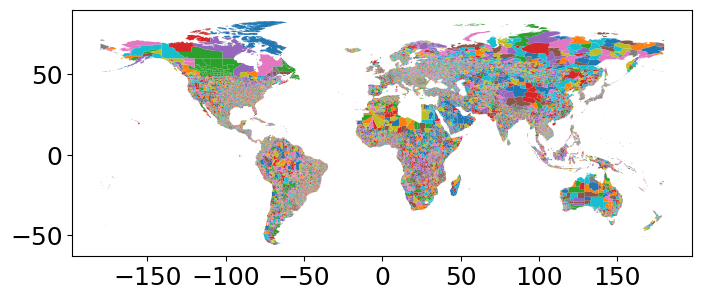

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
gadm_subset.plot(column='adm_2_name', categorical=False, ax=ax)

# plt.title('GADM Level 2 Boundaries')
plt.savefig(os.path.join(image_folder, f"gadm_level_2_boundaries_world.pdf"), format='pdf', dpi=3000)
plt.show()

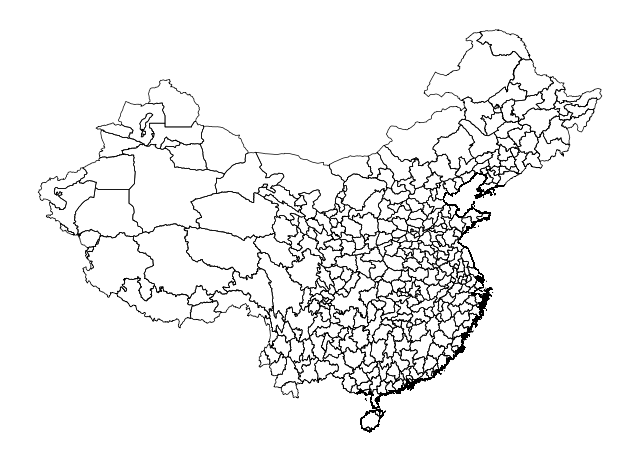

In [ ]:
# Plot only the boundaries (no fill) of Level 2 regions in China
china_data = gadm_subset[gadm_subset['adm_0_name'] == 'CHINA']

fig, ax = plt.subplots(figsize=(8, 6))
china_data.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
# plt.title('Municipality Boundaries of China (GADM Level 2)')
plt.axis('off')  # Optional: hides axis ticks
plt.savefig(os.path.join(image_folder, f"gadm_level_2_boundaries_china.pdf"), format='pdf', dpi=3000)
plt.show()

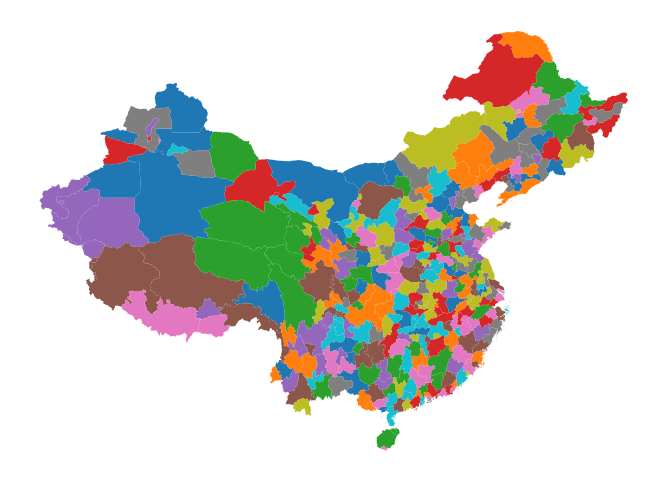

In [ ]:
# Plot only China's Level 2 regions
fig, ax = plt.subplots(figsize=(10, 6))
china_data.plot(column='adm_2_name', categorical=True, ax=ax, legend=False)
# plt.title('GADM Level 2 Boundaries of China')
plt.axis('off')  # Optional: hides axis ticks
plt.savefig(os.path.join(image_folder, f"gadm_level_2_boundaries_china_colored.pdf"), format='pdf', dpi=3000)
plt.show()

# DENGUE DATA

In [ ]:
# !wget -P "/content/data/DENGUE" "https://raw.githubusercontent.com/OpenDengue/master-repo/refs/heads/main/data/raw_data/masterDB_V1.2.csv"

# !wget -P "/content/data/DENGUE" "https://github.com/OpenDengue/master-repo/raw/main/data/releases/V1.2.2/Spatial_extract_V1_2_2.zip"
# with zipfile.ZipFile("/content/data/DENGUE/Spatial_extract_V1_2_2.zip", 'r') as file:
#      file.extractall("/content/data/DENGUE/Spatial_extract_V1_2_2")

In [ ]:
# Load Dengue Dataset
dengue_file_path = "/content/data/DENGUE/Spatial_extract_V1_2_2/Spatial_extract_V1_2_2.csv"
dengue_s = pd.read_csv(dengue_file_path, encoding="latin1", low_memory=False)
dengue_s.columns

Index(['adm_0_name', 'adm_1_name', 'adm_2_name', 'full_name', 'ISO_A0',
       'FAO_GAUL_code', 'RNE_iso_code', 'IBGE_code', 'calendar_start_date',
       'calendar_end_date', 'Year', 'dengue_total',
       'case_definition_standardised', 'S_res', 'T_res', 'UUID'],
      dtype='object')

In [ ]:
dengue_s.shape

(2319748, 16)

In [ ]:
dengue_s.adm_0_name.unique().shape

(11,)

In [ ]:
dengue_s[dengue_s.T_res=="Year"]

Output hidden; open in https://colab.research.google.com to view.

RAW DATA

In [ ]:
dengue_s.nunique()

,0
adm_0_name,102
adm_1_name,937
adm_2_name,6751
full_name,8158
ISO_A0,102
FAO_GAUL_code,7653
RNE_iso_code,951
IBGE_code,5332
calendar_start_date,1848
calendar_end_date,1845


In [ ]:
dengue_s['S_res'].value_counts()


,count
S_res,
Admin2,2319748
Admin1,131059
Admin0,26087


In [ ]:
dengue_s = dengue_s[dengue_s['S_res'] == 'Admin2']
print(dengue_s.isna().sum()[dengue_s.isna().sum() > 0])


IBGE_code    218882
dtype: int64


In [ ]:
dengue_s.isna().sum()

,0
adm_0_name,0
adm_1_name,0
adm_2_name,0
full_name,0
ISO_A0,0
FAO_GAUL_code,0
RNE_iso_code,0
IBGE_code,218882
calendar_start_date,0
calendar_end_date,0


In [ ]:
dengue_s.Year.max()

2023

In [ ]:
dengue_s.nunique()

,0
adm_0_name,11
adm_1_name,173
adm_2_name,6721
full_name,7228
ISO_A0,11
FAO_GAUL_code,6849
RNE_iso_code,174
IBGE_code,5332
calendar_start_date,1318
calendar_end_date,1318


In [ ]:
dengue_s.shape

(2319748, 16)

DROP ROWS WHERE BOTH ADM 1 NAME AND ADM 2 NAMES ARE NAN VALUES

In [ ]:
dengue_s = dengue_s[~(dengue_s['adm_1_name'].isna() & dengue_s['adm_2_name'].isna())]
dengue_s.head(2)

,adm_0_name,adm_1_name,adm_2_name,full_name,ISO_A0,FAO_GAUL_code,RNE_iso_code,IBGE_code,calendar_start_date,calendar_end_date,Year,dengue_total,case_definition_standardised,S_res,T_res,UUID
904,ARGENTINA,FORMOSA,BERMEJO,"ARGENTINA, FORMOSA, BERMEJO",ARG,4636,AR-P,NaN,2018-12-30,2019-01-05,2018,1.0,Total,Admin2,Week,MOH-ARG-2019-Y01-00
905,ARGENTINA,SANTA FE,GARAY,"ARGENTINA, SANTA FE, GARAY",ARG,4830,AR-S,NaN,2018-12-30,2019-01-05,2018,1.0,Total,Admin2,Week,MOH-ARG-2019-Y01-00


In [ ]:
print(dengue_s.isna().sum()[dengue_s.isna().sum() > 0])

IBGE_code    218882
dtype: int64


 KEEP ONLY IMPORTANT COLUMNS IN dengue_s:


In [ ]:
dengue_spatial = dengue_s[['adm_0_name', 'adm_1_name', 'adm_2_name', 'full_name', 'calendar_start_date',
                                 'calendar_end_date', 'Year',  'dengue_total', 'case_definition_standardised', 'T_res' ]]

# Optional: reset index
dengue_spatial.reset_index(drop=True, inplace=True)

dengue_spatial.head(3)

,adm_0_name,adm_1_name,adm_2_name,full_name,calendar_start_date,calendar_end_date,Year,dengue_total,case_definition_standardised,T_res
0,ARGENTINA,FORMOSA,BERMEJO,"ARGENTINA, FORMOSA, BERMEJO",2018-12-30,2019-01-05,2018,1.0,Total,Week
1,ARGENTINA,SANTA FE,GARAY,"ARGENTINA, SANTA FE, GARAY",2018-12-30,2019-01-05,2018,1.0,Total,Week
2,ARGENTINA,MISIONES,GENERAL MANUEL BELGRANO,"ARGENTINA, MISIONES, GENERAL MANUEL BELGRANO",2018-12-30,2019-01-05,2018,1.0,Total,Week


In [ ]:
# Count of missing values per column
dengue_spatial.isna().sum().sort_values(ascending=False)

,0
adm_0_name,0
adm_1_name,0
adm_2_name,0
full_name,0
calendar_start_date,0
calendar_end_date,0
Year,0
dengue_total,0
case_definition_standardised,0
T_res,0


In [ ]:
dengue_spatial.shape

(2319748, 10)

In [ ]:
dengue_spatial_1 = dengue_spatial[['adm_0_name', 'adm_1_name', 'adm_2_name', 'calendar_start_date',
                                 'calendar_end_date', 'Year',  'dengue_total', 'T_res']]
dengue_spatial_1.head()

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res
0,ARGENTINA,FORMOSA,BERMEJO,2018-12-30,2019-01-05,2018,1.0,Week
1,ARGENTINA,SANTA FE,GARAY,2018-12-30,2019-01-05,2018,1.0,Week
2,ARGENTINA,MISIONES,GENERAL MANUEL BELGRANO,2018-12-30,2019-01-05,2018,1.0,Week
3,ARGENTINA,MISIONES,IGUAZU,2018-12-30,2019-01-05,2018,4.0,Week
4,ARGENTINA,FORMOSA,MATACOS,2018-12-30,2019-01-05,2018,1.0,Week


In [ ]:
costa_rica_19 = pd.read_csv("/content/data/DENGUE/costa_rica_2019.csv", encoding="latin1", low_memory=False)
costa_rica_19.head()

,ï»¿Provincia,CantÃ³n,TituloASE,AÃ±o,AÃ±o (filtro),Iso3166,PaÃ­s,Semana,"Incidencia x 100,000","Incidencia x 100,000 habs.",Indicador (filtro),Number of Records,Total Casos,Total de Casos
0,Guanacaste,Abangares,2019 (a la semana 52),2019,2019,188,Costa Rica,52,369.938681,250.2,958,1,73,958
1,San JosÃ©,Acosta,2019 (a la semana 52),2019,2019,188,Costa Rica,52,9.226369,34.3,561,1,2,561
2,San JosÃ©,Alajuelita,2019 (a la semana 52),2019,2019,188,Costa Rica,52,38.077831,34.3,561,1,35,561
3,San JosÃ©,Aserri,2019 (a la semana 52),2019,2019,188,Costa Rica,52,12.804712,34.3,561,1,8,561
4,Alajuela,Atenas,2019 (a la semana 52),2019,2019,188,Costa Rica,52,622.673670,183.6,1816,1,179,"1,816"


In [ ]:
# Load Dengue Dataset
costa_rica_19 = pd.read_csv("/content/data/DENGUE/costa_rica_2019.csv", encoding="latin1", low_memory=False)
costa_rica_19 = costa_rica_19.rename(columns={'PaÃ­s': 'adm_0_name', 'AÃ±o': 'Year', 'Total Casos': 'dengue_total',
                              'ï»¿Provincia': 'adm_1_name', 'CantÃ³n': 'adm_2_name'})
costa_rica_19 = costa_rica_19[['adm_0_name', 'adm_1_name', 'adm_2_name', 'Year', 'dengue_total']]


costa_rica_20 = pd.read_csv("/content/data/DENGUE/costa_rica_2020.csv", encoding="latin1", low_memory=False)
costa_rica_20 = costa_rica_20.rename(columns={'PaÃ­s': 'adm_0_name', 'AÃ±o': 'Year', 'Total Casos': 'dengue_total',
                              'ï»¿Provincia': 'adm_1_name', 'CantÃ³n': 'adm_2_name'})
costa_rica_20 = costa_rica_20[['adm_0_name', 'adm_1_name', 'adm_2_name', 'Year', 'dengue_total']]


costa_rica_21 = pd.read_csv("/content/data/DENGUE/costa_rica_2021.csv", encoding="latin1", low_memory=False)
costa_rica_21 = costa_rica_21.rename(columns={'PaÃ­s': 'adm_0_name', 'AÃ±o': 'Year', 'Total Casos': 'dengue_total',
                              'ï»¿Provincia': 'adm_1_name', 'CantÃ³n': 'adm_2_name'})
costa_rica_21 = costa_rica_21[['adm_0_name', 'adm_1_name', 'adm_2_name', 'Year', 'dengue_total']]


costa_rica_22 = pd.read_csv("/content/data/DENGUE/costa_rica_2022.csv", encoding="latin1", low_memory=False)
costa_rica_22 = costa_rica_22.rename(columns={'PaÃ­s': 'adm_0_name', 'AÃ±o': 'Year', 'Total Casos': 'dengue_total',
                              'ï»¿Provincia': 'adm_1_name', 'CantÃ³n': 'adm_2_name'})
costa_rica_22 = costa_rica_22[['adm_0_name', 'adm_1_name', 'adm_2_name', 'Year', 'dengue_total']]


costa_rica_23 = pd.read_csv("/content/data/DENGUE/costa_rica_2023.csv", encoding="latin1", low_memory=False)
costa_rica_23 = costa_rica_23.rename(columns={'PaÃ­s': 'adm_0_name', 'AÃ±o': 'Year', 'Total Casos': 'dengue_total',
                              'ï»¿Provincia': 'adm_1_name', 'CantÃ³n': 'adm_2_name'})
costa_rica_23 = costa_rica_23[['adm_0_name', 'adm_1_name', 'adm_2_name', 'Year', 'dengue_total']]

costa_rica_24 = pd.read_csv("/content/data/DENGUE/costa rica 2024.csv", encoding="latin1", low_memory=False)
costa_rica_24 = costa_rica_24.rename(columns={'PaÃ­s': 'adm_0_name', 'AÃ±o': 'Year', 'Total Casos': 'dengue_total',
                              'ï»¿Provincia': 'adm_1_name', 'CantÃ³n': 'adm_2_name'})
costa_rica_24 = costa_rica_24[['adm_0_name', 'adm_1_name', 'adm_2_name', 'Year', 'dengue_total']]


costa_rica_2019_24 = pd.concat([costa_rica_19, costa_rica_20, costa_rica_21, costa_rica_22, costa_rica_23, costa_rica_24])
costa_rica_2019_24['T_res'] = 'Year'
costa_rica_2019_24['calendar_start_date'] = pd.to_datetime(costa_rica_2019_24['Year'].astype(str) + '-01-01')
costa_rica_2019_24['calendar_end_date'] = pd.to_datetime(costa_rica_2019_24['Year'].astype(str) + '-12-31')
costa_rica_2019_24 = costa_rica_2019_24[['adm_0_name', 'adm_1_name', 'adm_2_name', 'calendar_start_date', 'calendar_end_date', 'Year', 'dengue_total', 'T_res']]
costa_rica_2019_24

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res
0,Costa Rica,Guanacaste,Abangares,2019-01-01,2019-12-31,2019,73,Year
1,Costa Rica,San JosÃ©,Acosta,2019-01-01,2019-12-31,2019,2,Year
2,Costa Rica,San JosÃ©,Alajuelita,2019-01-01,2019-12-31,2019,35,Year
3,Costa Rica,San JosÃ©,Aserri,2019-01-01,2019-12-31,2019,8,Year
4,Costa Rica,Alajuela,Atenas,2019-01-01,2019-12-31,2019,179,Year
5,Costa Rica,Guanacaste,Bagaces,2019-01-01,2019-12-31,2019,19,Year
6,Costa Rica,Heredia,Barva,2019-01-01,2019-12-31,2019,18,Year
7,Costa Rica,Heredia,BelÃ©n,2019-01-01,2019-12-31,2019,19,Year
8,Costa Rica,Puntarenas,Buenos Aires,2019-01-01,2019-12-31,2019,1,Year
9,Costa Rica,Guanacaste,CaÃ±as,2019-01-01,2019-12-31,2019,77,Year


In [ ]:
costa_rica_2019_24.nunique()

,0
adm_0_name,1
adm_1_name,7
adm_2_name,167
calendar_start_date,6
calendar_end_date,6
Year,6
dengue_total,210
T_res,1


In [ ]:
peru = pd.read_csv("https://raw.githubusercontent.com/cathalmills/peru_dengue_province/refs/heads/main/data/cases/2010_2021_cases_full_data.csv")
#peru.insert(0, "adm_0_name", "PERU")
peru.head()

,Departamnento,Provincia,Distrito,Ano,Semana actualización,Eventos o daños,Semana,Sexo,Tipo de diagnóstico,DIS
0,AMAZONAS,BAGUA,BAGUA,2012,19,Dengue,6,Femenino,Confirmados,1
1,AMAZONAS,BAGUA,COPALLIN,2012,19,Dengue,7,Femenino,Confirmados,1
2,ANCASH,SANTA,CHIMBOTE,2012,19,Dengue,14,Femenino,Confirmados,1
3,AMAZONAS,BAGUA,BAGUA,2012,19,Dengue,1,Femenino,Confirmados,1
4,LORETO,MAYNAS,IQUITOS,2010,19,Dengue,52,Femenino,Confirmados,1


In [ ]:
#  National Centre for Epidemiology, Disease Prevention and Control (Peru CDC)

peru = pd.read_csv("https://raw.githubusercontent.com/cathalmills/peru_dengue_province/refs/heads/main/data/cases/2010_2021_cases_full_data.csv")
peru.insert(0, "adm_0_name", "PERU")
peru.to_csv("peru_dengue_2010_2021_with_country.csv", index=False)
peru = peru.rename(columns={'PaÃ­s': 'adm_0_name', 'Ano': 'Year', 'DIS': 'dengue_total',
                              'Departamnento': 'adm_1_name', 'Provincia': 'adm_2_name'})

peru = peru.groupby(['adm_0_name', 'adm_1_name', 'adm_2_name', 'Year'], as_index=False)['dengue_total'].sum()
peru['T_res'] = 'Year'
peru['calendar_start_date'] = pd.to_datetime(peru['Year'].astype(str) + '-01-01')
peru['calendar_end_date'] = pd.to_datetime(peru['Year'].astype(str) + '-12-31')
peru = peru[['adm_0_name', 'adm_1_name', 'adm_2_name', 'calendar_start_date', 'calendar_end_date', 'Year', 'dengue_total', 'T_res']]
peru.head(10)

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res
0,PERU,AMAZONAS,BAGUA,2010-01-01,2010-12-31,2010,155,Year
1,PERU,AMAZONAS,BAGUA,2011-01-01,2011-12-31,2011,195,Year
2,PERU,AMAZONAS,BAGUA,2012-01-01,2012-12-31,2012,372,Year
3,PERU,AMAZONAS,BAGUA,2013-01-01,2013-12-31,2013,66,Year
4,PERU,AMAZONAS,BAGUA,2014-01-01,2014-12-31,2014,55,Year
5,PERU,AMAZONAS,BAGUA,2015-01-01,2015-12-31,2015,8,Year
6,PERU,AMAZONAS,BAGUA,2016-01-01,2016-12-31,2016,22,Year
7,PERU,AMAZONAS,BAGUA,2017-01-01,2017-12-31,2017,56,Year
8,PERU,AMAZONAS,BAGUA,2018-01-01,2018-12-31,2018,92,Year
9,PERU,AMAZONAS,BAGUA,2019-01-01,2019-12-31,2019,127,Year


In [ ]:
peru.nunique()

,0
adm_0_name,1
adm_1_name,22
adm_2_name,123
calendar_start_date,14
calendar_end_date,14
Year,14
dengue_total,448
T_res,1


In [ ]:
dengue_main = pd.concat([dengue_spatial_1, costa_rica_2019_24, peru])
dengue_main.head()

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res
0,ARGENTINA,FORMOSA,BERMEJO,2018-12-30,2019-01-05,2018,1.0,Week
1,ARGENTINA,SANTA FE,GARAY,2018-12-30,2019-01-05,2018,1.0,Week
2,ARGENTINA,MISIONES,GENERAL MANUEL BELGRANO,2018-12-30,2019-01-05,2018,1.0,Week
3,ARGENTINA,MISIONES,IGUAZU,2018-12-30,2019-01-05,2018,4.0,Week
4,ARGENTINA,FORMOSA,MATACOS,2018-12-30,2019-01-05,2018,1.0,Week


In [ ]:
def parse_dengue_total(val):
    val = str(val).strip()
    if "to" in val:
        # Handle ranges like "1 to 4"
        try:
            low, high = map(int, val.replace(",", "").split("to"))
            return int((low + high) / 2)
        except:
            return int(float(val))
    else:
        # Handle values like "3,128" or "412"
        try:
            return int(float(val.replace(",", "")))
        except:
            return int(float(val))

dengue_main.dengue_total = dengue_main.dengue_total.apply(parse_dengue_total)
dengue_main.head()

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res
0,ARGENTINA,FORMOSA,BERMEJO,2018-12-30,2019-01-05,2018,1,Week
1,ARGENTINA,SANTA FE,GARAY,2018-12-30,2019-01-05,2018,1,Week
2,ARGENTINA,MISIONES,GENERAL MANUEL BELGRANO,2018-12-30,2019-01-05,2018,1,Week
3,ARGENTINA,MISIONES,IGUAZU,2018-12-30,2019-01-05,2018,4,Week
4,ARGENTINA,FORMOSA,MATACOS,2018-12-30,2019-01-05,2018,1,Week


In [ ]:
dengue_main.isna().sum()

,0
adm_0_name,0
adm_1_name,0
adm_2_name,0
calendar_start_date,0
calendar_end_date,0
Year,0
dengue_total,0
T_res,0


In [ ]:
dengue_main.shape

(2321164, 8)

Plot Total Dengue Cases per Year (only yearly data)



In [ ]:
def plot_dengue_trend(data, country, municipality, time_res='Year'):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure Year is integer
    data = data.copy()
    data['Year'] = data['Year'].astype(int)

    # Filter for the specified country, municipality, and time resolution
    subset = data[
        (data['adm_0_name'] == country) &
        (data['adm_2_name'] == municipality) &
        (data['T_res'] == time_res)
    ]

    if subset.empty:
        print("No data found for this country and municipality.")
        return

    # Group by Year
    yearly = subset.groupby('Year')['dengue_total'].sum().reset_index()

    # Plot
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=yearly, x='Year', y='dengue_total', marker='o')
    # plt.title(f"Dengue Trend in {municipality.title()}, {country.title()}")
    plt.xlabel("Year")
    plt.ylabel("Total Dengue Cases")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(image_folder, f"dengue_trend_{municipality.lower()}_{country.lower()}.pdf"), format='pdf', dpi=3000)
    plt.show()


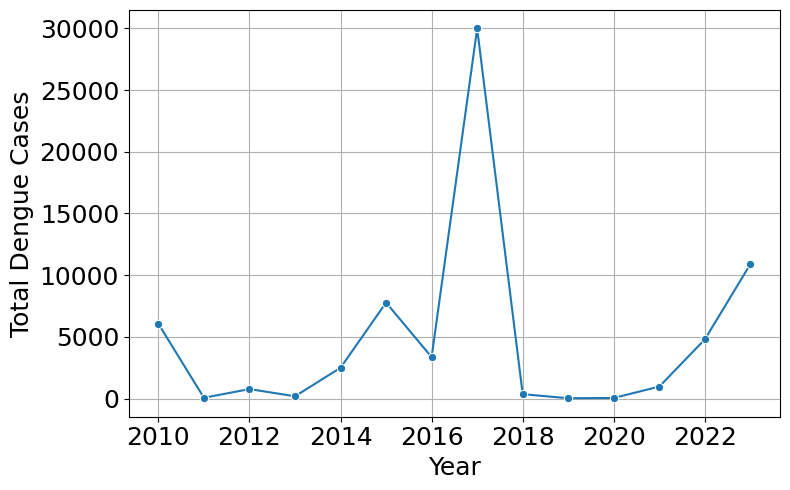

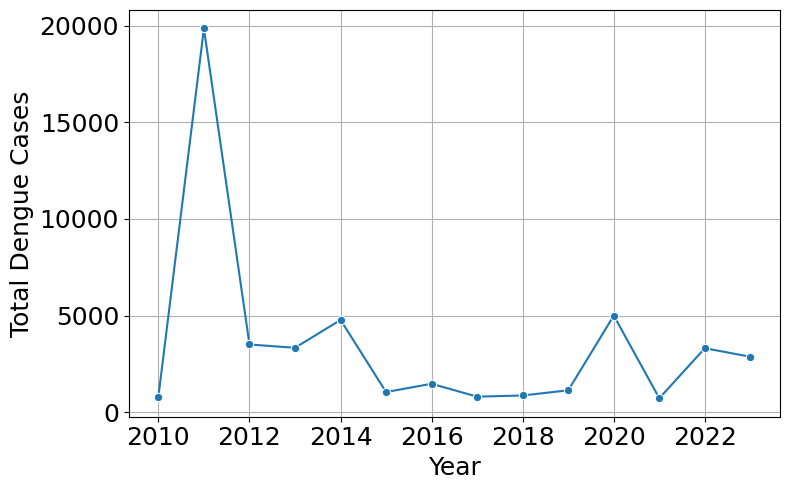

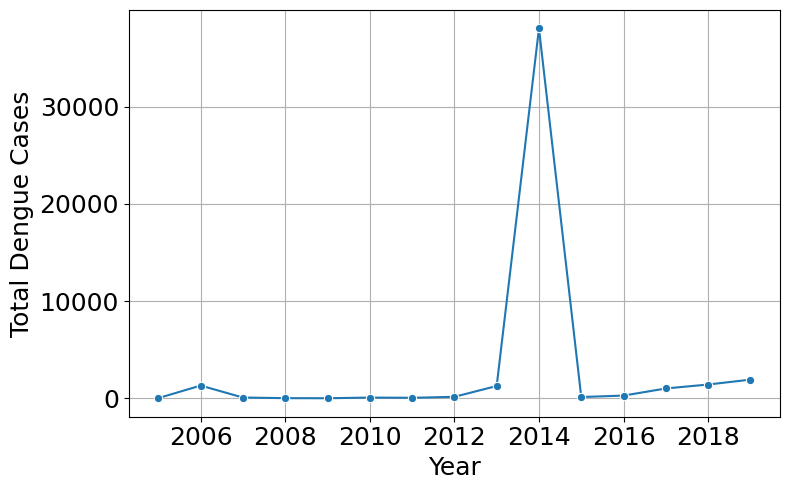

In [ ]:
# Find top 3 municipalities with highest total dengue cases
top3 = (
    dengue_main[dengue_main["T_res"] == "Year"]
    .groupby(["adm_0_name", "adm_2_name"])["dengue_total"]
    .sum()
    .reset_index()
    .sort_values(by="dengue_total", ascending=False)
    .head(3)
)

# Plot trend for each
for _, row in top3.iterrows():
    plot_dengue_trend(dengue_main, country=row["adm_0_name"], municipality=row["adm_2_name"])


In [ ]:
dengue_main[dengue_main["T_res"] == "Year"].groupby(["adm_0_name", "adm_2_name"])["dengue_total"].sum().reset_index().sort_values(by="dengue_total", ascending=False).head()


,adm_0_name,adm_2_name,dengue_total
353,PERU,PIURA,67805
334,PERU,MAYNAS,49489
3,CHINA,GUANGZHOU,45842
295,PERU,CORONEL PORTILLO,37814
377,PERU,TAMBOPATA,26214


Data cleaning

In [ ]:
dengue_main.adm_0_name.unique()

array(['ARGENTINA', 'BRAZIL', 'CHINA', 'COLOMBIA', 'COSTA RICA',
       'PAKISTAN', 'PANAMA', 'PERU', 'PHILIPPINES', 'TAIWAN',
       'UNITED STATES OF AMERICA', 'Costa Rica'], dtype=object)

In [ ]:
#  Remove exact duplicates
dengue_spatial_2 = dengue_main.drop_duplicates(subset=[ "adm_0_name", "adm_1_name", "adm_2_name", "calendar_start_date", "calendar_end_date"])

# Standardize location names
def clean_location(name):
    if pd.isna(name):  # Handle NaN values
        return name
    name = name.strip().lower()  # Convert to lowercase and remove extra spaces
    name = unicodedata.normalize("NFKD", name).encode("ascii", "ignore").decode("utf-8")  # Remove accents
    name = re.sub(r"\bprovince of\b", "", name)  # Remove 'province of'
    name = re.sub(r"\btownship\b|\bdist\b|\bcd\b", "", name)  # Remove 'township', 'dist', 'cd'
    name = re.sub(r"\bcity of\b", "", name)  # Remove 'city of'
    name = re.sub(r"\bcity\b", "", name)  # Remove 'city'
    name = re.sub(r"\bcounty\b", "", name)  # Remove 'city of'
    name = re.sub(r"[^a-z\s]", "", name)  # Remove special characters
    name = re.sub(r"\s+", " ", name)  # Replace multiple spaces with a single space
    return name.strip()

# Apply the updated cleaning function
dengue_spatial_2["adm_1_name"] = dengue_spatial_2["adm_1_name"].astype(str).apply(clean_location)
dengue_spatial_2["adm_2_name"] = dengue_spatial_2["adm_2_name"].astype(str).apply(clean_location)
dengue_spatial_2["adm_0_name"] = dengue_spatial_2["adm_0_name"].astype(str).apply(clean_location)

# Standardize names in GADM dataset
gadm_subset["adm_0_name"] = gadm_subset["adm_0_name"].astype(str).apply(clean_location)
gadm_subset["adm_1_name"] = gadm_subset["adm_1_name"].astype(str).apply(clean_location)
gadm_subset["adm_2_name"] = gadm_subset["adm_2_name"].astype(str).apply(clean_location)

# Remove duplicate rows
duplicate_rows = dengue_spatial_2.duplicated(
    subset=["adm_0_name", "adm_1_name", "adm_2_name", "calendar_start_date", "calendar_end_date"],
    keep="first"
)
dengue_spatial_2 = dengue_spatial_2[~duplicate_rows].reset_index(drop=True)

# Ensure both are datetime
dengue_spatial_2["calendar_start_date"] = pd.to_datetime(dengue_spatial_2["calendar_start_date"], errors="coerce")
dengue_spatial_2["calendar_end_date"] = pd.to_datetime(dengue_spatial_2["calendar_end_date"], errors="coerce")

# Compute period_length_days
dengue_spatial_2["period_length_days"] = (
    (dengue_spatial_2["calendar_end_date"] - dengue_spatial_2["calendar_start_date"]).dt.days + 1
)

dengue_spatial_2.head(10)

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res,period_length_days
0,argentina,formosa,bermejo,2018-12-30,2019-01-05,2018,1,Week,7
1,argentina,santa fe,garay,2018-12-30,2019-01-05,2018,1,Week,7
2,argentina,misiones,general manuel belgrano,2018-12-30,2019-01-05,2018,1,Week,7
3,argentina,misiones,iguazu,2018-12-30,2019-01-05,2018,4,Week,7
4,argentina,formosa,matacos,2018-12-30,2019-01-05,2018,1,Week,7
5,argentina,chaco,chacabuco,2019-01-06,2019-01-12,2019,1,Week,7
6,argentina,misiones,eldorado,2019-01-06,2019-01-12,2019,1,Week,7
7,argentina,misiones,general manuel belgrano,2019-01-06,2019-01-12,2019,1,Week,7
8,argentina,misiones,iguazu,2019-01-06,2019-01-12,2019,1,Week,7
9,argentina,santa fe,la capital,2019-01-06,2019-01-12,2019,3,Week,7


Remaining Countries, regions and municipals

In [ ]:
dengue_countries = set(dengue_spatial_2["adm_0_name"].dropna().unique())
dengue_regions = set(dengue_spatial_2["adm_1_name"].dropna().unique())
dengue_municipals = set(dengue_spatial_2["adm_2_name"].dropna().unique())

print(len(dengue_countries), len(dengue_regions),len(dengue_municipals))

11 193 6845


In [ ]:
dengue_countries

{'argentina',
 'brazil',
 'china',
 'colombia',
 'costa rica',
 'pakistan',
 'panama',
 'peru',
 'philippines',
 'taiwan',
 'united states of america'}

In [ ]:
# Extract year from calendar_start_date
dengue_spatial_2['calendar_year'] = pd.to_datetime(dengue_spatial_2['calendar_start_date']).dt.year

# Group by country and list sorted unique years
years_by_country = dengue_spatial_2.groupby('adm_0_name')['calendar_year'].unique().apply(sorted)
for country, years in years_by_country.items():
    print(f"{country}: {list(years)}")

argentina: [2018, 2019, 2020, 2021]
brazil: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
china: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
colombia: [2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
costa rica: [2012, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
pakistan: [2021, 2022]
panama: [2010, 2011, 2012]
peru: [2006, 2007, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
philippines: [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
taiwan: [1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023]
united states of america: [1924, 1925]


Print unique values in 'case_definition_standardised'

In [ ]:
# print(" Unique values in 'case_definition_standardised':")
# print(dengue_spatial_2["case_definition_standardised"].dropna().unique())
# print("\n")

In [ ]:
dengue_main["calendar_start_date"] = pd.to_datetime(dengue_main["calendar_start_date"], errors="coerce")
dengue_main["calendar_end_date"] = pd.to_datetime(dengue_main["calendar_end_date"], errors="coerce")
dengue_main["period_length_days"] = (
    (dengue_main["calendar_end_date"] - dengue_main["calendar_start_date"]).dt.days + 1
)

period_summary_before = dengue_main["period_length_days"].value_counts().sort_index()
period_summary_after_cleaning = dengue_spatial_2["period_length_days"].value_counts().sort_index()

# Combine into one DataFrame for comparison
comparison_df = pd.DataFrame({
    "Before Cleaning": period_summary_before.astype(int),
    "After Cleaning": period_summary_after_cleaning.astype(int)
}).fillna(0)


print("\n Combined Comparison:")
print(comparison_df)


 Combined Comparison:
                    Before Cleaning  After Cleaning
period_length_days                                 
6                              4888            4888
7                           1812148         1812148
28                            32920           32920
29                             8910            8910
30                           167391          167391
31                           292979          292979
84                               69              69
364                             338             338
365                            1099            1099
366                             355             355
371                              67              67


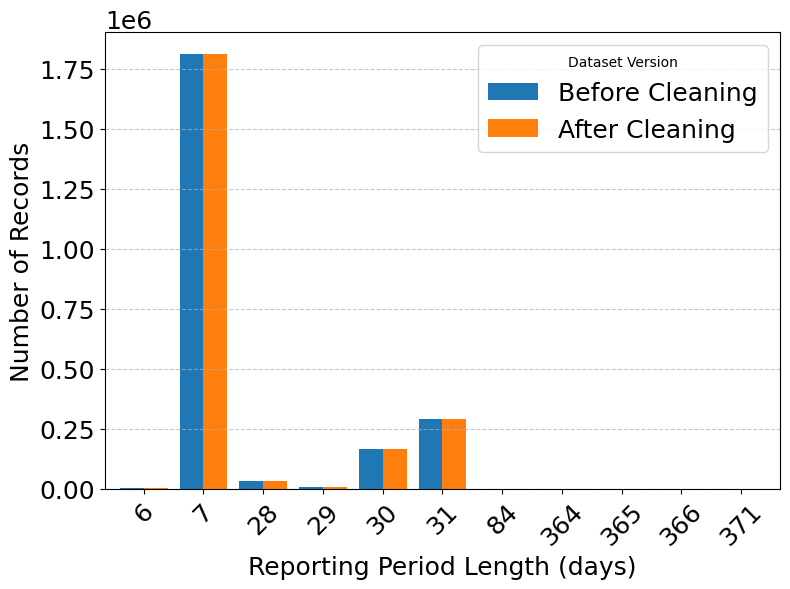

In [ ]:
# Filter rows with actual datauy
filtered_df = comparison_df[(comparison_df != 0).any(axis=1)].copy()

# Convert index to string for proper bar chart spacing
filtered_df.index = filtered_df.index.astype(str)

# Plot the filtered comparison
ax = filtered_df.plot(kind='bar', figsize=(8, 6), width=0.8)
# ax.set_title("Reporting Periods (in days): Before vs After Cleaning", fontsize=14)
ax.set_xlabel("Reporting Period Length (days)")
ax.set_ylabel("Number of Records")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Dataset Version")
plt.tight_layout()
plt.savefig(os.path.join(image_folder, f"dengue_reporting_days_versions_cleaning.pdf"), format='pdf', dpi=3000)
plt.show()

Aggregate the weekly and monthly records into yearly totals per municipality

In [ ]:
print(" Unique values in 'T_res':")
print(dengue_spatial_2["T_res"].dropna().unique())

 Unique values in 'T_res':
['Week' 'Month' 'Year']


Available Years in Dataset

In [ ]:
# Set display options to show full data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.max_seq_items', None)

# Group counts per country and T_res
tres_counts = dengue_spatial_2.groupby(['adm_2_name', 'T_res']).size().unstack(fill_value=0)

# Get unique years per country
years_available = dengue_spatial_2.groupby("adm_2_name")["Year"].unique().apply(sorted)

# Combine both into one DataFrame
country_summary = tres_counts.join(years_available.rename("Years"))

# Preview the result
country_summary.head(40)

,Month,Week,Year,Years
adm_2_name,,,,
abadia de goias,156,416,0,"[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
abadia dos dourados,60,416,0,"[2002, 2006, 2007, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
abadiania,120,416,0,"[2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
abaete,144,416,0,"[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
abaetetuba,156,416,0,"[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
abaiara,132,364,0,"[2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]"
abaira,72,259,0,"[2001, 2002, 2003, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]"
abangares,1,0,10,"[2013, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]"
abare,72,313,0,"[2002, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018, 2019, 2020, 2021]"


Aggregation Code

In [ ]:
# Separate by T_res
yearly_data = dengue_spatial_2[dengue_spatial_2["T_res"] == "Year"].copy()
monthly_data = dengue_spatial_2[dengue_spatial_2["T_res"] == "Month"].copy()
weekly_data = dengue_spatial_2[dengue_spatial_2["T_res"] == "Week"].copy()

# Aggregate Month and Week data
def aggregate_by_year(df, label):
    agg = (
        df.groupby(["adm_0_name", "adm_1_name", "adm_2_name", "Year"], as_index=False)
        .agg({
            "dengue_total": "sum",
            "calendar_start_date": "min",
            "calendar_end_date": "max"
            #"full_name": "first"
        })
    )
    agg["T_res"] = f"Year (from {label})"
    return agg

monthly_agg = aggregate_by_year(monthly_data, "Month")
weekly_agg = aggregate_by_year(weekly_data, "Week")

# Concatenate all
combined_all = pd.concat([yearly_data, monthly_agg, weekly_agg], ignore_index=True)

# Sort so the best resolution comes first: Year > Year (from Month) > Year (from Week)
sort_order = {"Year": 0, "Year (from Month)": 1, "Year (from Week)": 2}
combined_all["sort_priority"] = combined_all["T_res"].map(sort_order)
combined_all = combined_all.sort_values(by=["adm_0_name", "adm_1_name", "adm_2_name", "Year", "sort_priority"])

# Drop duplicates keeping the best resolution
final_combined = combined_all.drop_duplicates(subset=["adm_0_name", "adm_1_name", "adm_2_name", "Year"], keep="first")
final_combined = final_combined.drop(columns=["sort_priority"])

# Drop unnecessary columns if they exist
cols_to_drop = ["case_definition_standardised", "period_length_days", "S_res", "full_name", "calendar_year"]
final_combined = final_combined.drop(columns=cols_to_drop, errors="ignore")

final_combined.head(10)

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res
43890,argentina,buenos aires,almirante brown,2020-01-26,2020-08-08,2020,122,Year (from Week)
43891,argentina,buenos aires,almirante brown,2021-04-04,2021-04-10,2021,1,Year (from Week)
43892,argentina,buenos aires,avellaneda,2020-01-26,2020-05-30,2020,360,Year (from Week)
43893,argentina,buenos aires,azul,2020-03-01,2020-04-04,2020,2,Year (from Week)
43894,argentina,buenos aires,bahia blanca,2020-03-01,2020-04-11,2020,3,Year (from Week)
43895,argentina,buenos aires,berazategui,2019-02-10,2019-02-16,2019,1,Year (from Week)
43896,argentina,buenos aires,berazategui,2020-02-09,2020-11-21,2020,286,Year (from Week)
43897,argentina,buenos aires,berazategui,2021-03-07,2021-04-17,2021,2,Year (from Week)
43898,argentina,buenos aires,berisso,2020-02-23,2020-05-09,2020,24,Year (from Week)
43899,argentina,buenos aires,bragado,2020-02-23,2020-03-07,2020,2,Year (from Week)


In [ ]:
final_combined.shape

(91888, 8)

In [ ]:
dengue_countries = set(final_combined["adm_0_name"].dropna().unique())
dengue_regions = set(final_combined["adm_1_name"].dropna().unique())
dengue_municipals = set(final_combined["adm_2_name"].dropna().unique())

print(len(dengue_countries), len(dengue_regions),len(dengue_municipals))

11 193 6845


In [ ]:
final_combined.isna().sum()

,0
adm_0_name,0
adm_1_name,0
adm_2_name,0
calendar_start_date,0
calendar_end_date,0
Year,0
dengue_total,0
T_res,0


Visualization


In [ ]:
def plot_top5_municipality_trends(country_name, df, year_col="Year", value_col="dengue_total"):
    """
    Plot yearly dengue trends for top 5 municipalities in a country.

    Parameters:
    - country_name (str): Name of the country (e.g., "brazil")
    - df (DataFrame): DataFrame with at least adm_0_name, adm_2_name, year_col, and value_col
    - year_col (str): Column name for the year (default: "Year")
    - value_col (str): Column name for dengue totals (default: "dengue_total")
    """
    # Step 1: Filter for country
    country_df = df[df["adm_0_name"].str.lower() == country_name.lower()].copy()

    # Step 2: Get top 5 municipalities by total dengue
    top5_munis = (
        country_df.groupby("adm_2_name")[value_col]
        .sum()
        .nlargest(5)
        .index
    )

    # Step 3: Filter for those top 5
    top5_df = country_df[country_df["adm_2_name"].isin(top5_munis)]

    # Step 4: Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=top5_df,
        x=year_col,
        y=value_col,
        hue="adm_2_name",
        marker="o",
        lw=2
    )

    # plt.title(f"Top 5 {country_name.title()} Municipalities by Dengue Cases (Trend per Year)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Total Dengue Cases")
    plt.legend(title="Municipality", loc='center right', bbox_to_anchor=(1.5, .5))
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(image_folder, f"dengue_top_5_{country.lower()}_municipalities.pdf"), format='pdf', dpi=3000)
    plt.show()

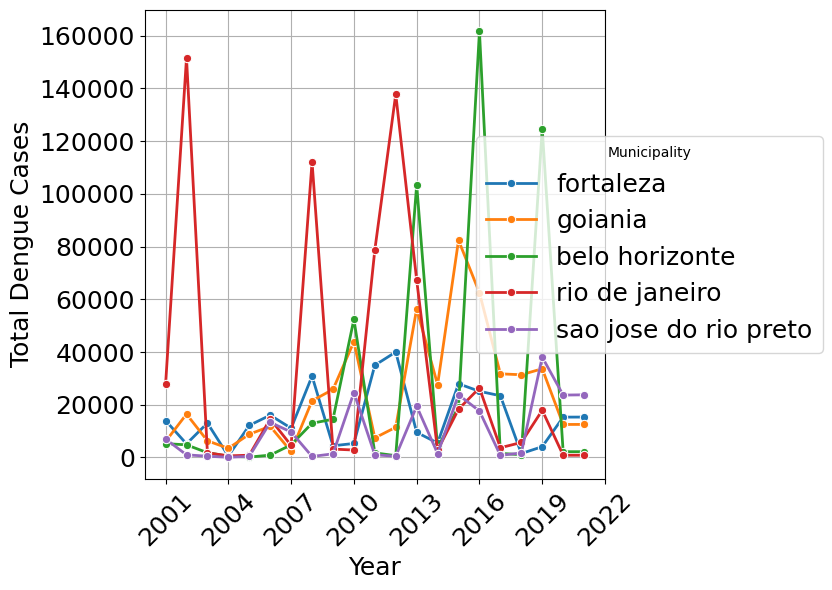

In [ ]:
plot_top5_municipality_trends("brazil", final_combined)

From the Costa Velis paper - "The median year of the input data and the model outputs is 2019."
(Section: Results – Emissions estimates)


This means:

The model uses lots of data (e.g. waste, rivers, population) from various years,

But after combining and normalizing everything, they produce macroplastic emission estimates that reflect conditions in 2019.

So the plastic data is for the year 2019.

### 10-year dengue window --- 2014 to 2023

In [ ]:
final_combined[final_combined.adm_0_name=='united states of america']

,adm_0_name,adm_1_name,adm_2_name,calendar_start_date,calendar_end_date,Year,dengue_total,T_res
95236,united states of america,alabama,jefferson,1924-01-20,1924-09-06,1924,0,Year (from Week)
95237,united states of america,alabama,jefferson,1925-01-11,1925-01-17,1925,0,Year (from Week)
95238,united states of america,alabama,mobile,1924-07-13,1924-07-19,1924,0,Year (from Week)
95239,united states of america,alabama,montgomery,1924-04-06,1924-04-12,1924,0,Year (from Week)
95240,united states of america,arkansas,madison,1924-08-31,1924-09-06,1924,0,Year (from Week)
95241,united states of america,arkansas,pulaski,1925-01-11,1925-01-17,1925,0,Year (from Week)
95242,united states of america,california,los angeles,1924-01-20,1924-09-27,1924,0,Year (from Week)
95243,united states of america,california,los angeles,1925-01-04,1925-01-17,1925,0,Year (from Week)
95244,united states of america,california,sacramento,1925-01-04,1925-01-10,1925,0,Year (from Week)
95245,united states of america,california,san francisco,1924-01-20,1924-09-06,1924,0,Year (from Week)


In [ ]:
final_combined.shape

(91888, 8)

In [ ]:
# Step 1: Filter to 10-year window centered around 2019
dengue_10yr = final_combined[final_combined["Year"].between(2014, 2023)]

# Step 2: Group and compute the average dengue total
dengue_avg = (
    dengue_10yr
    .groupby(["adm_0_name", "adm_1_name", "adm_2_name"], as_index=False)["dengue_total"]
    .mean()
    .rename(columns={"dengue_total": "mean_dengue_2014_2023"})
)

dengue_avg.head(40)

,adm_0_name,adm_1_name,adm_2_name,mean_dengue_2014_2023
0,argentina,buenos aires,almirante brown,61.500000
1,argentina,buenos aires,avellaneda,360.000000
2,argentina,buenos aires,azul,2.000000
3,argentina,buenos aires,bahia blanca,3.000000
4,argentina,buenos aires,berazategui,96.333333
5,argentina,buenos aires,berisso,24.000000
6,argentina,buenos aires,bragado,2.000000
7,argentina,buenos aires,brandsen,1.000000
8,argentina,buenos aires,campana,4.000000
9,argentina,buenos aires,canuelas,2.000000


Visualization

In [ ]:
dengue_avg.nunique()

,0
adm_0_name,8
adm_1_name,138
adm_2_name,6539
mean_dengue_2014_2023,2804


In [ ]:
dengue_avg.shape

(7068, 4)

In [ ]:
dengue_avg.adm_0_name.unique()

array(['argentina', 'brazil', 'china', 'colombia', 'costa rica',
       'pakistan', 'peru', 'taiwan'], dtype=object)

In [ ]:
usa = pd.read_csv("/content/data/DENGUE/Dengue cases by county based on year and travel status selected above.csv", encoding="latin1", low_memory=False)
usa.head(20)

,FullGeoName,Year,Travel status,County,Count,Legend,Notes
0,"AZ, Maricopa",2010 - 2024,Locally acquired,4013,1 to 4,1 to 4,"AZ, NA"
1,"CA, San Bernardino",2010 - 2024,Locally acquired,6071,1 to 4,1 to 4,"CA, NA"
2,"CA, San Diego",2010 - 2024,Locally acquired,6073,1 to 4,1 to 4,"CA, NA"
3,"DC, Washington",2010 - 2024,Locally acquired,11001,1 to 4,1 to 4,"DC, District of Columbia; In 2019, anti-DENV IgM antibody detected for this case may be a result of an infection that occurred during travel to a dengue-endemic country months prior to illness onset."
4,"FL, Collier",2010 - 2024,Locally acquired,12021,1 to 4,1 to 4,"FL, Collier County"
5,"FL, Orange",2010 - 2024,Locally acquired,12095,1 to 4,1 to 4,"FL, Orange County"
6,"FL, Osceola",2010 - 2024,Locally acquired,12097,1 to 4,1 to 4,"FL, Osceola County"
7,"FL, Polk",2010 - 2024,Locally acquired,12105,1 to 4,1 to 4,"FL, Polk County"
8,"FL, St Lucie",2010 - 2024,Locally acquired,12111,1 to 4,1 to 4,"FL, St. Lucie County"
9,"FL, Sarasota",2010 - 2024,Locally acquired,12115,1 to 4,1 to 4,"FL, Sarasota County"


In [ ]:
# Step 1: Extract state abbreviation and county name
usa = pd.read_csv("/content/data/DENGUE/Dengue cases by county based on year and travel status selected above.csv", encoding="latin1", low_memory=False)

usa[['state_abbr', 'county_name']] = usa['FullGeoName'].str.split(',', expand=True)
usa['state_abbr'] = usa['state_abbr'].str.strip()
usa['county_name'] = usa['county_name'].str.strip().str.upper()

# Handle missing FullGeoName using Notes column
mask_missing = usa['FullGeoName'].isna() | (usa['FullGeoName'].str.strip() == '')
extracted_notes = usa.loc[mask_missing, 'Notes'].str.extract(r'(?P<state_abbr>[A-Z]{2}),\s*(?P<county_name>[A-Za-z\s]+)')
usa.loc[mask_missing, 'state_abbr'] = extracted_notes['state_abbr']
usa.loc[mask_missing, 'county_name'] = extracted_notes['county_name'].str.upper()
usa.loc[mask_missing, 'FullGeoName'] = extracted_notes['state_abbr'] + ', ' + extracted_notes['county_name']

# Map state abbreviations to full names
state_abbr_to_name = {
    'AL': 'ALABAMA', 'AK': 'ALASKA', 'AZ': 'ARIZONA', 'AR': 'ARKANSAS', 'CA': 'CALIFORNIA',
    'CO': 'COLORADO', 'CT': 'CONNECTICUT', 'DE': 'DELAWARE', 'DC': 'DISTRICT OF COLUMBIA', 'FL': 'FLORIDA',
    'GA': 'GEORGIA', 'HI': 'HAWAII', 'ID': 'IDAHO', 'IL': 'ILLINOIS', 'IN': 'INDIANA',
    'IA': 'IOWA', 'KS': 'KANSAS', 'KY': 'KENTUCKY', 'LA': 'LOUISIANA', 'ME': 'MAINE',
    'MD': 'MARYLAND', 'MA': 'MASSACHUSETTS', 'MI': 'MICHIGAN', 'MN': 'MINNESOTA', 'MS': 'MISSISSIPPI',
    'MO': 'MISSOURI', 'MT': 'MONTANA', 'NE': 'NEBRASKA', 'NV': 'NEVADA', 'NH': 'NEW HAMPSHIRE',
    'NJ': 'NEW JERSEY', 'NM': 'NEW MEXICO', 'NY': 'NEW YORK', 'NC': 'NORTH CAROLINA', 'ND': 'NORTH DAKOTA',
    'OH': 'OHIO', 'OK': 'OKLAHOMA', 'OR': 'OREGON', 'PA': 'PENNSYLVANIA', 'RI': 'RHODE ISLAND',
    'SC': 'SOUTH CAROLINA', 'SD': 'SOUTH DAKOTA', 'TN': 'TENNESSEE', 'TX': 'TEXAS', 'UT': 'UTAH',
    'VT': 'VERMONT', 'VA': 'VIRGINIA', 'WA': 'WASHINGTON', 'WV': 'WEST VIRGINIA', 'WI': 'WISCONSIN',
    'WY': 'WYOMING', 'AS': 'AMERICAN SAMOA', 'GU': 'GUAM', 'MP': 'NORTHERN MARIANA ISLANDS',
    'PR': 'PUERTO RICO', 'TT': 'TRUST TERRITORIES', 'VI': 'VIRGIN ISLANDS',
    'MH': 'MARSHALL ISLANDS', 'FM': 'FEDERATED STATES OF MICRONESIA', 'PW': 'PALAU'
}

usa['adm_0_name'] = 'united states of america'
usa['adm_1_name'] = usa['state_abbr'].map(state_abbr_to_name).astype(str).apply(clean_location)
usa['adm_2_name'] = usa['county_name'].astype(str).apply(clean_location)
usa['adm_2_name'] = usa['adm_2_name'].str.replace(r'\bmunicipality\b', '', flags=re.IGNORECASE, regex=True).str.strip()


usa['mean_dengue_2014_2023'] = usa['Count']

# Select final columns
usa = usa[['adm_0_name', 'adm_1_name', 'adm_2_name','mean_dengue_2014_2023']]
usa['mean_dengue_2014_2023'] = usa['mean_dengue_2014_2023'].apply(parse_dengue_total)
usa.head()

,adm_0_name,adm_1_name,adm_2_name,mean_dengue_2014_2023
0,united states of america,arizona,maricopa,2
1,united states of america,california,san bernardino,2
2,united states of america,california,san diego,2
3,united states of america,district of columbia,washington,2
4,united states of america,florida,collier,2


In [ ]:
usa.shape

(122, 4)

In [ ]:
usa.nunique()

,0
adm_0_name,1
adm_1_name,16
adm_2_name,120
mean_dengue_2014_2023,88


In [ ]:
dengue_full_avg = pd.concat([dengue_avg, usa])

In [ ]:
dengue_full_avg[dengue_full_avg.adm_0_name=='united states of america']

,adm_0_name,adm_1_name,adm_2_name,mean_dengue_2014_2023
0,united states of america,arizona,maricopa,2.0
1,united states of america,california,san bernardino,2.0
2,united states of america,california,san diego,2.0
3,united states of america,district of columbia,washington,2.0
4,united states of america,florida,collier,2.0
5,united states of america,florida,orange,2.0
6,united states of america,florida,osceola,2.0
7,united states of america,florida,polk,2.0
8,united states of america,florida,st lucie,2.0
9,united states of america,florida,sarasota,2.0


In [ ]:
dengue_full_avg.nunique()

,0
adm_0_name,9
adm_1_name,154
adm_2_name,6648
mean_dengue_2014_2023,2851


In [ ]:
dengue_full_avg.shape

(7190, 4)

In [ ]:
def plot_top_municipalities_by_dengue(
    df,
    country,
    dengue_column="mean_dengue_2014_2023",
    top_n=5,
    palette="Reds"
):
    """
    Plot top municipalities in a specified country by average dengue cases.

    Parameters:
    - df: pandas DataFrame with dengue data.
    - country: Country name (string) to filter on (case-insensitive).
    - dengue_column: Name of the column containing dengue case averages.
    - top_n: Number of top municipalities to show.
    - palette: Seaborn color palette for the barplot.
    """
    # Filter and select top municipalities
    top_municipalities = (
        df[df["adm_0_name"].str.lower() == country.lower()]
        .nlargest(top_n, dengue_column)
        .sort_values(dengue_column)
    )

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_municipalities,
        y="adm_2_name",
        x=dengue_column,
        palette=palette
    )

    # plt.title(f"Top {top_n} Municipalities in {country.title()} by Avg Dengue Cases (2014–2023)")
    plt.xlabel("Mean Dengue Cases")
    plt.ylabel("Municipality")
    plt.tight_layout()
    plt.savefig(os.path.join(image_folder, f"avg_dengue_{top_n}_{country.lower()}_municipalities_cases.pdf"), format='pdf', dpi=3000)

    plt.show()


<ipython-input-169-50e3885d8d18>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


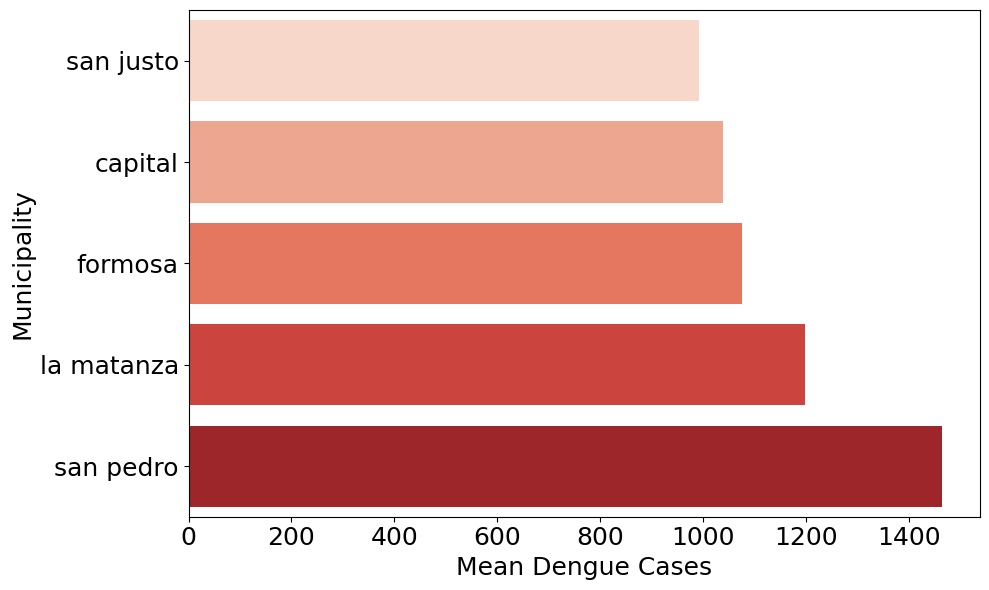

In [ ]:
plot_top_municipalities_by_dengue(dengue_full_avg, "argentina")

<ipython-input-169-50e3885d8d18>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


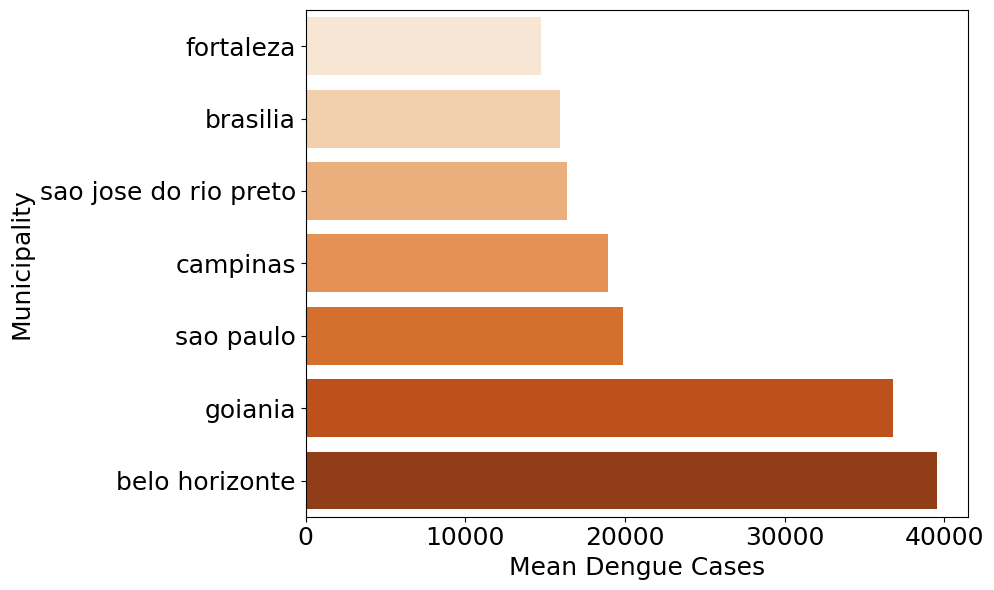

In [ ]:
plot_top_municipalities_by_dengue(dengue_full_avg, "brazil", top_n=7, palette="Oranges")

<ipython-input-169-50e3885d8d18>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


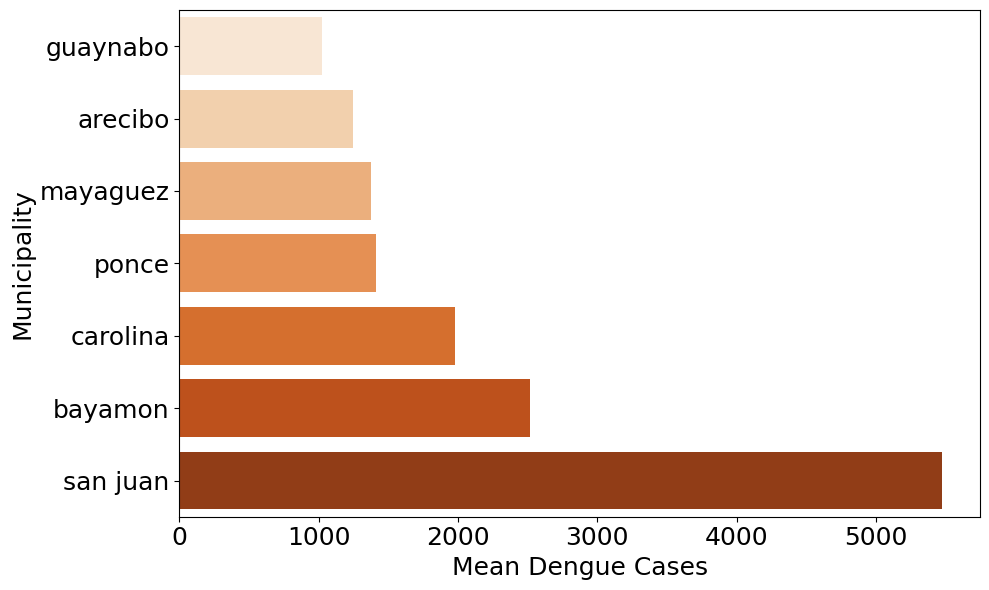

In [ ]:
plot_top_municipalities_by_dengue(dengue_full_avg, "united states of america", top_n=7, palette="Oranges")

In [ ]:
dengue_full_avg.to_csv(f"{data_folder}/dengue_avg_preprocessed.csv", index=False)

# #  Convert to GeoDataFrame (specify the geometry column)
# gadm_subset_gdf = gadm_subset.drop(columns=["centroid"])
# gadm_subset_gdf = gpd.GeoDataFrame(gadm_subset_gdf, geometry="geometry")

# # Save as GeoPackage
# gadm_subset_gdf.to_file("gadm_subset_gdf.gpkg", driver="GPKG")

print(" Saved Dengue file as 'dengue_avg_preprocessed.csv'")
# print(" Saved GADM preprocessed as 'gadm_subset_gdf.gpkg'")

 Saved Dengue file as 'dengue_avg_preprocessed.csv'


# No need to continue running but do so if you want to

### Mapping dengue Dataset with the GADM

In [ ]:
# Correct country names
country_corrections = {'united states':'united states of america'}
gadm_subset["adm_0_name"] = gadm_subset["adm_0_name"].replace(country_corrections)

# Extract unique country , region and municipal names from GADM
gadm_countries = set(gadm_subset["adm_0_name"].dropna().unique())
gadm_regions = set(gadm_subset["adm_1_name"].dropna().unique())
gadm_municipals = set(gadm_subset["adm_2_name"].dropna().unique())


print(len(gadm_countries), len(gadm_regions),len(gadm_municipals))

171 2808 42151


In [ ]:
matched_municipals_by_country = {}

for country in dengue_countries:
    gadm_muni = set(gadm_subset.loc[gadm_subset['adm_0_name'] == country, 'adm_2_name'])
    dengue_muni = set(dengue_full_avg.loc[dengue_full_avg['adm_0_name'] == country, 'adm_2_name'])

    matched = dengue_muni & gadm_muni  # Set intersection: matched municipalities
    matched_municipals_by_country[country] = (len(matched), sorted(matched))

for country in dengue_countries:
    print(f"🔍 {matched_municipals_by_country[country][0]} already matched municipalities with GADM in '{country}'...")

🔍 8 already matched municipalities with GADM in 'taiwan'...
🔍 21 already matched municipalities with GADM in 'china'...
🔍 0 already matched municipalities with GADM in 'philippines'...
🔍 4871 already matched municipalities with GADM in 'brazil'...
🔍 874 already matched municipalities with GADM in 'colombia'...
🔍 117 already matched municipalities with GADM in 'peru'...
🔍 229 already matched municipalities with GADM in 'argentina'...
🔍 8 already matched municipalities with GADM in 'pakistan'...
🔍 76 already matched municipalities with GADM in 'costa rica'...
🔍 0 already matched municipalities with GADM in 'panama'...
🔍 33 already matched municipalities with GADM in 'united states of america'...


In [ ]:
matched_municipals_by_country_region = {}

for country in dengue_countries:
    # Filter by country and extract (adm_1_name, adm_2_name) pairs
    gadm_muni = set(
        gadm_subset.loc[gadm_subset["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    dengue_muni = set(
        dengue_full_avg.loc[dengue_full_avg["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    # Match by (region, municipality)
    matched = dengue_muni & gadm_muni
    matched_municipals_by_country_region[country] = (len(matched), sorted(matched))

# Print results
for country in dengue_countries:
    print(f"🔍 {matched_municipals_by_country_region[country][0]} municipalities matched by region in '{country}'...")


🔍 0 municipalities matched by region in 'taiwan'...
🔍 21 municipalities matched by region in 'china'...
🔍 0 municipalities matched by region in 'philippines'...
🔍 5133 municipalities matched by region in 'brazil'...
🔍 858 municipalities matched by region in 'colombia'...
🔍 116 municipalities matched by region in 'peru'...
🔍 265 municipalities matched by region in 'argentina'...
🔍 5 municipalities matched by region in 'pakistan'...
🔍 73 municipalities matched by region in 'costa rica'...
🔍 0 municipalities matched by region in 'panama'...
🔍 31 municipalities matched by region in 'united states of america'...


In [ ]:
# Ensure clean strings before comparing
for df in [dengue_full_avg, gadm_subset]:
    for col in ["adm_0_name", "adm_1_name", "adm_2_name"]:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Create the dictionary
unmatched_dengue = {}

for country in dengue_countries:
    # Get all (region, municipality) pairs for this country
    dengue_munis = set(
        dengue_full_avg.loc[dengue_full_avg["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    gadm_munis = set(
        gadm_subset.loc[gadm_subset["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    # Get unmatched in dengue only
    unmatched_pairs = dengue_munis - gadm_munis

    if unmatched_pairs:
        unmatched_dengue[country] = sorted(unmatched_pairs)

# Check result
sum_ = 0
for country, pairs in unmatched_dengue.items():
    print(f"❌ {len(pairs)} unmatched in '{country}':")
    for region, muni in pairs[:5]:
        print(f"   - {region.title()} / {muni.title()}")
    if len(pairs) > 5:
        print("   ...")
    sum_ += len(pairs)
print(f"\n Unmatched dengue municipals : {sum_}")

❌ 247 unmatched in 'taiwan':
   - Changhua / Beidou
   - Changhua / Changhua
   - Changhua / Dacun
   - Changhua / Erlin
   - Changhua / Hemei
   ...
❌ 1 unmatched in 'china':
   - Yunnan / Jinghong
❌ 82 unmatched in 'brazil':
   - Alagoas / Olho D Agua Das Flores
   - Alagoas / Olho D Agua Do Casado
   - Alagoas / Olho D Agua Grande
   - Alagoas / Tanque D Arca
   - Bahia / Dias D Avila
   ...
❌ 175 unmatched in 'colombia':
   - Amazonas / Miriti Parana
   - Antioquia / Antioquia
   - Antioquia / Bolivar
   - Antioquia / Carmen De Viboral
   - Antioquia / Carolina
   ...
❌ 5 unmatched in 'peru':
   - Huanuco / Huanuco
   - Ica / Nasca
   - Lima / Lima
   - Loreto / Datem Del Maranon
   - Loreto / Putumayo
❌ 10 unmatched in 'argentina':
   - Chaco / De Julio
   - Chaco / De Mayo
   - Chaco / De Octubre
   - Formosa / Grl Jose De San Martin
   - La Rioja / General Juan F Quiroga
   ...
❌ 34 unmatched in 'pakistan':
   - Balochistan / Gwadar
   - Balochistan / Kech
   - Balochistan / Khu

In [ ]:
fuzzy_matches = []
replacement_map = {}

for country, unmatched_list in unmatched_dengue.items():
    for region, dengue_muni in unmatched_list:
        gadm_rows = gadm_subset[
            (gadm_subset["adm_0_name"] == country) &
            (gadm_subset["adm_1_name"] == region)
        ]

        candidates = gadm_rows["adm_2_name"].unique().tolist()

        if candidates:
            result = process.extractOne(
                dengue_muni, candidates,
                scorer=fuzz.token_sort_ratio,
                score_cutoff=85
            )

            if result:
                best_match, score = result
                matched_row = gadm_rows[gadm_rows["adm_2_name"] == best_match].iloc[0]

                fuzzy_matches.append({
                    "adm_0_name": country,
                    "original_adm_1": region,
                    "original_adm_2": dengue_muni,
                    "matched_adm_1": matched_row["adm_1_name"],
                    "matched_adm_2": matched_row["adm_2_name"],
                    "score": score
                })

                replacement_map[(dengue_muni, region, country)] = best_match

def apply_fuzzy_replacement(row):
    key = (
        row['adm_2_name'].strip().lower(),
        row['adm_1_name'].strip().lower(),
        row['adm_0_name'].strip().lower()
    )
    return replacement_map.get(key, row['adm_2_name'])

dengue_full_avg["adm_2_name"] = dengue_full_avg.apply(apply_fuzzy_replacement, axis=1)

In [ ]:
dengue_full_avg.head()

,adm_0_name,adm_1_name,adm_2_name,mean_dengue_2014_2023
0,argentina,buenos aires,almirante brown,61.500000
1,argentina,buenos aires,avellaneda,360.000000
2,argentina,buenos aires,azul,2.000000
3,argentina,buenos aires,bahia blanca,3.000000
4,argentina,buenos aires,berazategui,96.333333


In [ ]:
dengue_full_avg.nunique()

,0
adm_0_name,9
adm_1_name,154
adm_2_name,6643
mean_dengue_2014_2023,2851


In [ ]:
# Ensure clean strings before comparing
for df in [dengue_full_avg, gadm_subset]:
    for col in ["adm_0_name", "adm_1_name", "adm_2_name"]:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Create the dictionary
unmatched_dengue = {}

for country in dengue_countries:
    # Get all (region, municipality) pairs for this country
    dengue_munis = set(
        dengue_full_avg.loc[dengue_full_avg["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    gadm_munis = set(
        gadm_subset.loc[gadm_subset["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    # Get unmatched in dengue only
    unmatched_pairs = dengue_munis - gadm_munis

    if unmatched_pairs:
        unmatched_dengue[country] = sorted(unmatched_pairs)

# Check result
sum_ = 0
for country, pairs in unmatched_dengue.items():
    print(f"❌ {len(pairs)} unmatched in '{country}':")
    for region, muni in pairs[:5]:
        print(f"   - {region.title()} / {muni.title()}")
    if len(pairs) > 5:
        print("   ...")
    sum_ += len(pairs)
print(f"\n Unmatched dengue municipals : {sum_}")

❌ 247 unmatched in 'taiwan':
   - Changhua / Beidou
   - Changhua / Changhua
   - Changhua / Dacun
   - Changhua / Erlin
   - Changhua / Hemei
   ...
❌ 1 unmatched in 'china':
   - Yunnan / Jinghong
❌ 40 unmatched in 'brazil':
   - Alagoas / Olho D Agua Do Casado
   - Maranhao / Apicum Acu
   - Maranhao / Conceicao Do Lago Acu
   - Maranhao / Olho D Agua Das Cunhas
   - Maranhao / Pindare Mirim
   ...
❌ 162 unmatched in 'colombia':
   - Antioquia / Antioquia
   - Antioquia / Bolivar
   - Antioquia / Carolina
   - Antioquia / Puerto Nare La Magdalena
   - Antioquia / San Andres
   ...
❌ 4 unmatched in 'peru':
   - Ica / Nasca
   - Lima / Lima
   - Loreto / Datem Del Maranon
   - Loreto / Putumayo
❌ 8 unmatched in 'argentina':
   - Chaco / De Julio
   - Chaco / De Mayo
   - Chaco / De Octubre
   - Formosa / Grl Jose De San Martin
   - Misiones / De Mayo
   ...
❌ 33 unmatched in 'pakistan':
   - Balochistan / Gwadar
   - Balochistan / Kech
   - Balochistan / Khuzdar
   - Balochistan / Kil

Correcting inconsistencies in municipal names

In [ ]:
costa_rica_map = {
    "coronado": "vazquez de coronado",
    "belan": "belen"
}

argentina_map = {
    "de mayo": "veinticinco de mayo",
    "de julio": "nueve de julio",
    "de octubre": "doce de octubre",
    "juan f ibarra": "juan felipe ibarra",

}

brazil_map = {
    "olho d agua do casado": "olho dagua do casado",
    "pau d arco": "pau darco",
    "fortaleza do tabocao": "tabocao",
    "estrela d oeste": "estrela doeste",
    "guarani d oeste": "guarani doeste",
    "pariquera acu": "pariqueraacu",
    "herval d oeste": "herval doeste",
    "sao felipe d oeste": "sao felipe doeste",
    "santa luzia d oeste": "santa luzia doeste",
    "nova brasilandia d oeste": "nova brasilandia doeste",
    "machadinho d oeste": "machadinho doeste",
    "espigao d oeste": "espigao doeste",
    "alta floresta d oeste": "alta floresta doeste",
    "xangri la": "xangrila",
    "sant ana do livramento": "santana do livramento",
    "nao me toque": "naome toque",
    "varre sai": "varresai",
    "apicum acu": "apicumacu",
    "conceicao do lago acu": "conceicao do lagoacu",
    "olho d agua das cunhas": "olho dagua das cunhas",
    "pindare mirim": "pindaremirim",
    "figueiropolis d oeste": "figueiropolis doeste",
    "gloria d oeste": "gloria doeste",
    "lambari d oeste": "lambari doeste",
    "mirassol d oeste": "mirassol doeste",
    "olhos d agua": "olhosdagua",
    "pingo d agua": "pingodagua",
    "sapucai mirim": "sapucaimirim",
    "sem peixe": "sempeixe",
    "igarape acu": "igarapeacu",
    "peixe boi": "peixeboi",
    "tome acu": "tomeacu",
    "mae d agua": "mae dagua",
    "barra d alcantara": "barra dalcantara",
    "itapejara d oeste": "itapejara doeste",
    "sao jorge d oeste": "sao jorge doeste",
    "governador dix sept rosado": "governador dixsept rosado",
    "olho d agua do borges": "olho dagua do borges"
}

usa_map = {
    "st lucie": "saint lucie"
}

peru_map = {
    "nasca": "nazca"
}

colombia_map = {
    "carolina": "carolina del principe",
    "puerto nare la magdalena": "puerto nare",
    "san andres": "san andres de cuerquia",
    "yondo casabe": "yondo",
    "cartagena": "cartagena de indias",
    "san estanislao": "san estanislao de kostka",
    "tiquisio puerto rico": "tiquisio",
    "villarica": "villa rica",
    "patia el bordo": "patia",
    "manaure balcon del cesar": "manaure",
    "alto baudo pie de pato": "alto baudo",
    "bahia solano mutis":"bahia solano",
    "bajo baudo pizarro": "bajo baudo",
    "bojaya bellavista": "bojaya",
    "canton de san pablo managru": "el canton del san pablo",
    "litoral del bajo san juan": "el litoral del san juan",
    "medio baudo boca de pepe": "medio baudo",
    "rioquito": "rio quito",
    "sahagun": "san bernardino de sahagun",
    "lorica": "santa cruz de lorica",
    "ospina perez venecia": "venecia",
    "rafael reyes apulo": "rafael reyes",
    "isnos san jose de isnos": "isnos",
    "ariguani el dificil": "ariguani",
    "pijino del carmen pijino": "pijino del carmen",
    "sitio nuevo": "sitionuevo",
    "cubarral": "san luis de cubarral",
    "vistahermosa": "vista hermosa",
    "alban san jose": "alban",
    "arboleda berruecos": "arboleda",
    "colon genova": "colon",
    "el tablon": "el tablon de gomez",
    "francisco pizarro salahonda": "francisco pizarro",
    "los andes sotomayor": "los andes",
    "magui payan": "magui",
    "mallama piedrancha": "mallama",
    "olaya herrerabocas de satinga": "olaya herrera",
    "roberto payan san jose": "roberto payan",
    "santa barbara iscuande": "santa barbara",
    "santa cruz guachaves": "santa cruz",
    "mocoa": "san miguel de mocoa",
    "coloso ricaurte": "coloso",
    "galeras nueva granada": "galeras",
    "la union": "la union de sucre",
    "palmito": "san antonio de palmito",
    "armero guayabal": "armero",
    "mariquita": "san sebastian de mariquita",
    "palocabildo": "palo cabildo",
    "polo nuevo": "polonuevo",
    "pasto": "san juan de pasto"
}

country_maps ={
    "costa rica": costa_rica_map,
    "argentina": argentina_map,
    "brazil": brazil_map,
    "united states of america": usa_map,
    "colombia": colombia_map,
    "peru": peru_map
}

# GADM Maps
pakistan_map_gadm = {
    "khyberpakhtunkhwa": "khyber pakhtunkhwa"
}

colombia_map_gadm = {
    "bogota dc": "bogota"
}

gadm_adm_1_maps = {
    "pakistan": pakistan_map_gadm,
    "colombia": colombia_map_gadm
}

gadm_adm_2_maps = {
    "colombia": colombia_map_gadm
}

# Loop through each country and apply replacements
for country, mapping in country_maps.items():
    mask = dengue_full_avg["adm_0_name"].str.lower() == country
    dengue_full_avg.loc[mask, "adm_2_name"] = (
        dengue_full_avg.loc[mask, "adm_2_name"].replace(mapping)
    )

for country, mapping in gadm_adm_1_maps.items():
    mask = gadm_subset["adm_0_name"].str.lower() == country
    gadm_subset.loc[mask, "adm_1_name"] = (
        gadm_subset.loc[mask, "adm_1_name"].replace(mapping)
    )

for country, mapping in gadm_adm_2_maps.items():
    mask = gadm_subset["adm_0_name"].str.lower() == country
    gadm_subset.loc[mask, "adm_2_name"] = (
        gadm_subset.loc[mask, "adm_2_name"].replace(mapping)
    )

In [ ]:
# Ensure clean strings before comparing
for df in [dengue_full_avg, gadm_subset]:
    for col in ["adm_0_name", "adm_1_name", "adm_2_name"]:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Create the dictionary
unmatched_dengue = {}

for country in dengue_countries:
    # Get all (region, municipality) pairs for this country
    dengue_munis = set(
        dengue_full_avg.loc[dengue_full_avg["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    gadm_munis = set(
        gadm_subset.loc[gadm_subset["adm_0_name"] == country, ["adm_1_name", "adm_2_name"]]
        .apply(tuple, axis=1)
    )

    # Get unmatched in dengue only
    unmatched_pairs = dengue_munis - gadm_munis

    if unmatched_pairs:
        unmatched_dengue[country] = sorted(unmatched_pairs)

# Check result
sum_ = 0
for country, pairs in unmatched_dengue.items():
    print(f"❌ {len(pairs)} unmatched in '{country}':")
    for region, muni in pairs[:5]:
        print(f"   - {region.title()} / {muni.title()}")
    if len(pairs) > 5:
        print("   ...")
    sum_ += len(pairs)
print(f"\n Unmatched dengue municipals : {sum_}")

❌ 247 unmatched in 'taiwan':
   - Changhua / Beidou
   - Changhua / Changhua
   - Changhua / Dacun
   - Changhua / Erlin
   - Changhua / Hemei
   ...
❌ 1 unmatched in 'china':
   - Yunnan / Jinghong
❌ 2 unmatched in 'brazil':
   - Rio Grande Do Norte / Augusto Severo
   - Rio Grande Do Sul / Naome Toque
❌ 112 unmatched in 'colombia':
   - Antioquia / Antioquia
   - Antioquia / Bolivar
   - Antioquia / La Union De Sucre
   - Antioquia / San Pedro
   - Antioquia / Sopetran
   ...
❌ 3 unmatched in 'peru':
   - Lima / Lima
   - Loreto / Datem Del Maranon
   - Loreto / Putumayo
❌ 1 unmatched in 'argentina':
   - Formosa / Grl Jose De San Martin
❌ 30 unmatched in 'pakistan':
   - Balochistan / Gwadar
   - Balochistan / Kech
   - Balochistan / Khuzdar
   - Balochistan / Killaabdullah
   - Balochistan / Lasbella
   ...
❌ 36 unmatched in 'costa rica':
   - Alajuela / Alfaro Ruiz
   - Alajuela / Valverde Vega
   - Guanacaste / Caaas
   - Liman / Guacimo
   - Liman / Liman
   ...
❌ 90 unmatched i

Fuzzy matching

MERGE

In [ ]:
# Merge while maintaining row count
dengue_merged = dengue_full_avg.merge(
    gadm_subset,
    on=["adm_0_name", "adm_1_name", "adm_2_name"],
    how="inner"  # Use 'left' join to avoid adding extra rows
)

# Verify row count remains the same
print(f"Original rows: {dengue_full_avg.shape[0]}, Merged rows: {dengue_merged.shape[0]}")


Original rows: 7190, Merged rows: 6669


In [ ]:
dengue_merged.nunique()

,0
adm_0_name,8
adm_1_name,118
adm_2_name,6186
mean_dengue_2014_2023,2723
GID_2,6662
geometry,6662
centroid,6662


In [ ]:
dengue_merged.head()

,adm_0_name,adm_1_name,adm_2_name,mean_dengue_2014_2023,GID_2,geometry,centroid
0,argentina,buenos aires,almirante brown,61.500000,ARG.1.4_1,"MULTIPOLYGON (((-58.39741 -34.91209, -58.40034 -34.90818, -58.40404 -34.90313, -58.41127 -34.89327, -58.41673 -34.88583, -58.40952 -34.88224, -58.40963 -34.8821, -58.41254 -34.87813, -58.41394 -34.87624, -58.42628 -34.85947, -58.43229 -34.85128, -58.43691 -34.84498, -58.44139 -34.83885, -58.4429...",POINT (-58.36831 -34.83864)
1,argentina,buenos aires,avellaneda,360.000000,ARG.1.7_1,"MULTIPOLYGON (((-58.33411 -34.73055, -58.33783 -34.72811, -58.33927 -34.72687, -58.34151 -34.72494, -58.3438 -34.723, -58.34671 -34.7205, -58.34784 -34.71955, -58.34869 -34.71881, -58.34946 -34.71816, -58.35174 -34.71621, -58.35195 -34.71603, -58.35344 -34.71474, -58.35656 -34.71204, -58.35922 -...",POINT (-58.34009 -34.68142)
2,argentina,buenos aires,azul,2.000000,ARG.1.9_1,"MULTIPOLYGON (((-59.49092 -36.23094, -59.2936 -36.38111, -59.29304 -36.38154, -59.23526 -36.42534, -59.25563 -36.4427, -59.19642 -36.48732, -59.20232 -36.49344, -59.16847 -36.51886, -59.14232 -36.53849, -59.14828 -36.5443, -59.20072 -36.59549, -59.21912 -36.58027, -59.22368 -36.58019, -59.22411 ...",POINT (-59.69994 -36.79136)
3,argentina,buenos aires,bahia blanca,3.000000,ARG.1.10_1,"MULTIPOLYGON (((-62.21736 -38.83569, -62.21625 -38.83569, -62.21625 -38.83541, -62.21569 -38.83541, -62.21569 -38.83569, -62.21542 -38.83569, -62.21542 -38.83597, -62.21514 -38.83597, -62.21514 -38.83625, -62.21486 -38.83625, -62.21486 -38.84069, -62.21458 -38.84069, -62.21458 -38.84125, -62.214...",POINT (-62.16959 -38.58023)
4,argentina,buenos aires,berazategui,96.333333,ARG.1.14_1,"MULTIPOLYGON (((-58.19181 -34.73733, -58.19125 -34.73736, -58.19125 -34.73764, -58.19097 -34.73764, -58.19097 -34.73792, -58.19042 -34.73792, -58.19042 -34.73819, -58.18986 -34.73819, -58.18986 -34.73875, -58.18903 -34.73875, -58.18903 -34.73903, -58.18847 -34.73903, -58.18847 -34.73931, -58.187...",POINT (-58.15472 -34.81923)


In [208]:
# 1. Ensure the column is numeric
dengue_merged["mean_dengue_2014_2023"] = pd.to_numeric(
    dengue_merged["mean_dengue_2014_2023"], errors="coerce"
)

# 2. Drop any rows where the value is still NaN (optional but common)
vals = dengue_merged["mean_dengue_2014_2023"].dropna()

# 3. Sample standard deviation (uses n-1 by default)
sd_mean_dengue = vals.std()             # same as vals.std(ddof=1)

print(f"SD of mean_dengue_2014_2023: {sd_mean_dengue:.3f}")


SD of mean_dengue_2014_2023: 972.341


In [ ]:
#  Convert to GeoDataFrame (specify the geometry column)
dengue_merged_gdf = dengue_merged.drop(columns=["centroid"])
dengue_merged_gdf = gpd.GeoDataFrame(dengue_merged_gdf, geometry="geometry")
gadm_subset_gdf = gadm_subset.drop(columns=["centroid"])
gadm_subset_gdf = gpd.GeoDataFrame(gadm_subset_gdf, geometry="geometry")

# Save as GeoPackage
dengue_merged_gdf.to_file(f"{data_folder}/dengue_preprocessed_main.gpkg", driver="GPKG")
gadm_subset_gdf.to_file(f"{data_folder}/gadm_subset_gdf.gpkg", driver="GPKG")

print(" Saved dengue_merged_gdf as 'dengue_preprocessed_main.gpkg'")
print(" Saved gadm_subset_gdf as 'gadm_subset_gdf.gpkg'")

 Saved dengue_merged_gdf as 'dengue_preprocessed_main.gpkg'
 Saved gadm_subset_gdf as 'gadm_subset_gdf.gpkg'


In [ ]:
country_cases = dengue_merged.groupby('adm_0_name')['mean_dengue_2014_2023'].sum().reset_index()

country_cases = country_cases.sort_values(by='mean_dengue_2014_2023', ascending=False)

print(country_cases.head(10))  # top 10 countries with highest dengue burden

#Show the top country
top_country = country_cases.iloc[0]
print(f"\n Country with highest total dengue cases: {top_country['adm_0_name'].title()} ({top_country['mean_dengue_2014_2023']:,} cases)")


                 adm_0_name  mean_dengue_2014_2023
1                    brazil          895834.904762
3                  colombia           59873.351587
6                      peru           41331.936111
0                 argentina           23595.250000
2                     china           16715.000000
4                costa rica           12558.367460
7  united states of america             858.000000
5                  pakistan             580.000000

 Country with highest total dengue cases: Brazil (895,834.9047619047 cases)


In [ ]:
def plot_top20_dengue_bar(country_name, df, value_col='mean_dengue_2014_2023'):
    """
    Plot top 20 municipalities in a country by average dengue cases.

    Parameters:
    - country_name (str): Name of the country (e.g., "brazil")
    - df (DataFrame): DataFrame with dengue data including adm_0_name, adm_2_name, and value_col
    - value_col (str): Column to use for dengue values (default: 'mean_dengue_2014_2023')
    """
    # Step 1: Select top 20
    top20 = (
        df[df["adm_0_name"].str.lower() == country_name.lower()]
        .nlargest(20, value_col)
        .sort_values(value_col)
    )

    # Step 2: Normalize and create colormap
    norm = mcolors.Normalize(vmin=top20[value_col].min(), vmax=top20[value_col].max())
    sm = cm.ScalarMappable(norm=norm, cmap="YlOrRd")
    colors = [sm.to_rgba(val) for val in top20[value_col]]

    # Step 3: Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=value_col,
        y="adm_2_name",
        data=top20,
        palette=colors
    )
    # plt.title(f"Top 20 {country_name.title()} Municipalities by Avg Dengue (2014–2023)")
    plt.xlabel("Mean Dengue Cases")
    plt.ylabel("Municipality")
    plt.tight_layout()
    plt.savefig(os.path.join(image_folder, f"top_20_{country.lower()}_municipalities_by_avg_dengue.pdf"), format='pdf', dpi=3000)
    plt.show()

<ipython-input-189-844e8846ef58>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


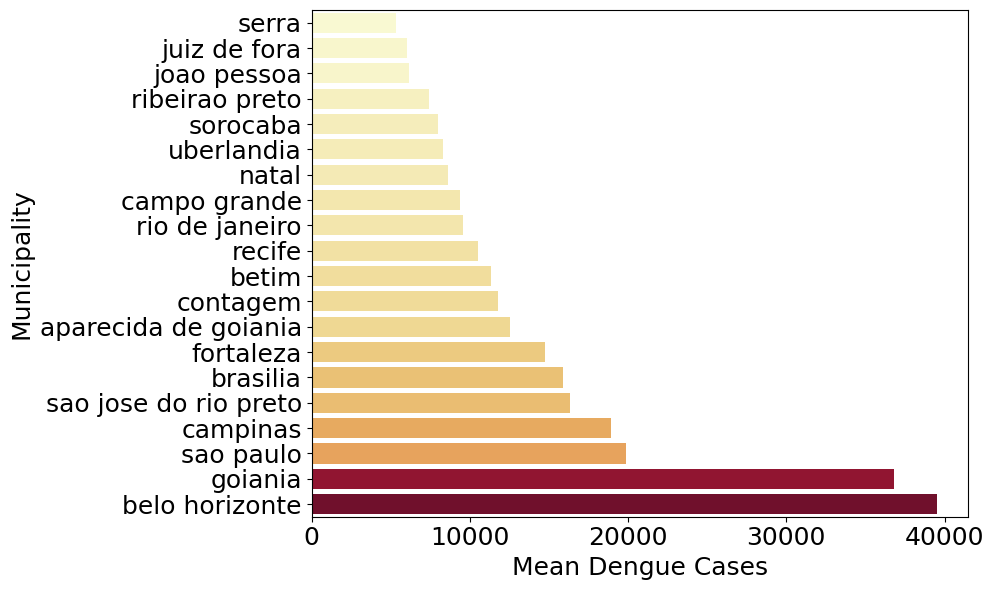

In [ ]:
plot_top20_dengue_bar("brazil", dengue_merged)

In [ ]:
def plot_dengue_choropleth(country_name, dengue_merged_gdf, gadm_subset, value_col='mean_dengue_2014_2023'):
    """
    Plot a choropleth of dengue cases at the municipality level,
    with country base map from gadm_subset.

    Parameters:
    - country_name (str): Country name (e.g., "brazil")
    - dengue_merged_gdf (GeoDataFrame): GeoDataFrame with dengue cases and geometry
    - gadm_subset (GeoDataFrame): GADM GeoDataFrame for full admin boundaries
    - value_col (str): Name of the dengue value column (default: "mean_dengue_2014_2023")
    """
    df = dengue_merged_gdf.query("adm_0_name.str.lower() == @country_name.lower()", engine='python')
    gdf = df.groupby("adm_2_name").agg({value_col: "sum", "geometry": "first"}).reset_index()
    gdf = gpd.GeoDataFrame(gdf, geometry="geometry")
    gdf = gdf[gdf.geometry.notna() & gdf.is_valid]

    base = gadm_subset.query("adm_0_name.str.lower() == @country_name.lower()", engine='python')
    bounds = base.total_bounds
    gdf = gdf.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]]
    base = base[base.geometry.notna() & base.is_valid]

    ax = base.plot(color='whitesmoke', edgecolor='lightgrey', figsize=(12, 10), linewidth=0.4)
    gdf.plot(column=value_col, cmap='Reds', edgecolor='black', legend=True, ax=ax, linewidth=0.4,
             legend_kwds={"shrink": 0.6})
    # ax.set_title(f"Total Dengue Cases by Municipality in {country_name.title()}", fontsize=16)
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(image_folder, f"dengue_cases_by_municipalities_in_{country.lower()}.pdf"), format='pdf', dpi=3000)
    plt.show()


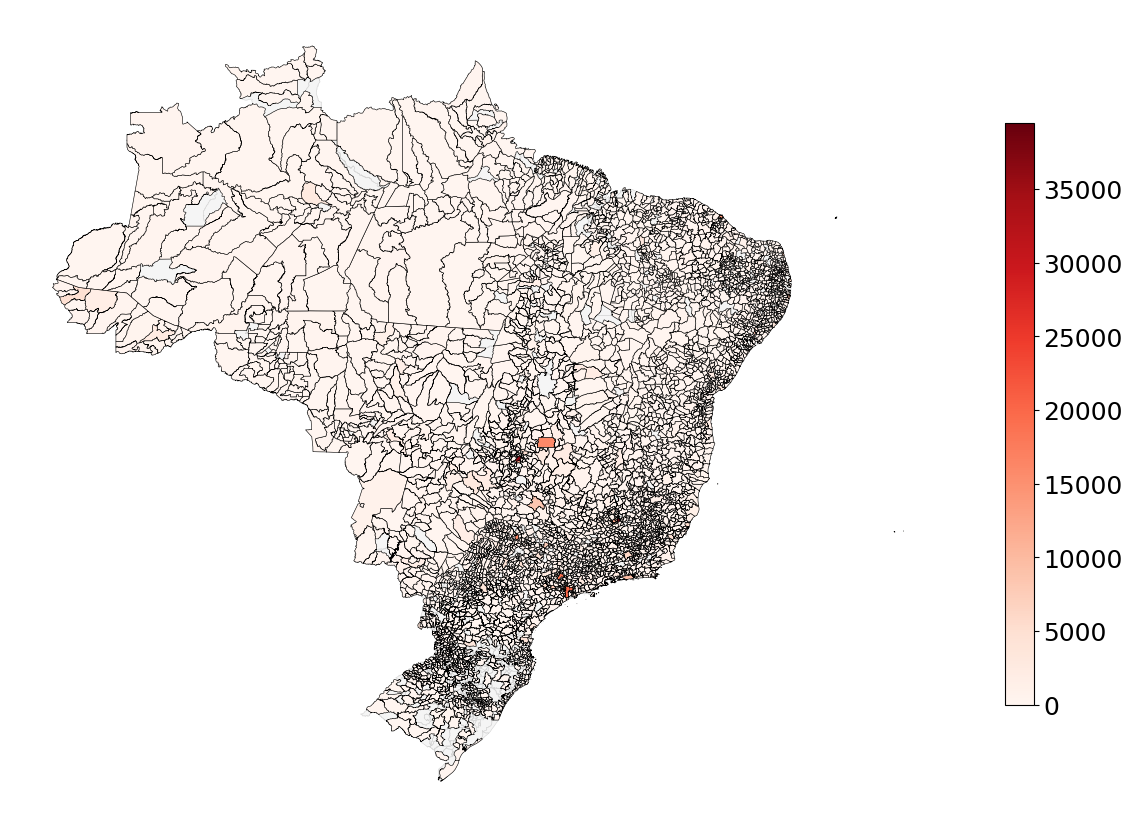

In [ ]:
plot_dengue_choropleth(
    country_name='brazil',
    dengue_merged_gdf=dengue_merged,
    gadm_subset=gadm_subset
)


In [ ]:
def plot_global_dengue_choropleth(dengue_merged_gdf, gadm_subset, value_col='mean_dengue_2014_2023'):
    """
    Plot a global choropleth of dengue cases by municipality using GADM geometries.

    Parameters:
    - dengue_merged_gdf (GeoDataFrame): Contains dengue data and geometries
    - gadm_subset (GeoDataFrame): Full GADM admin boundaries with geometries
    - value_col (str): Column with dengue values (default: 'mean_dengue_2014_2023')
    """

    # Group and clean
    gdf = (
        dengue_merged_gdf
        .groupby(["adm_0_name", "adm_2_name"])
        .agg({value_col: "sum", "geometry": "first"})
        .reset_index()
    )
    gdf = gpd.GeoDataFrame(gdf, geometry="geometry")
    gdf = gdf[gdf.geometry.notna() & gdf.is_valid]

    # Prepare base map from all GADM
    focus_countries = ['argentina', 'bolivia', 'brazil', 'chile', 'colombia',
                       'ecuador', 'guyana', 'paraguay', 'peru', 'suriname', 'uruguay', 'venezuela']
    gdf = gdf[gdf.adm_0_name.isin(focus_countries)]
    gadm_subset = gadm_subset[gadm_subset.adm_0_name.isin(focus_countries)]
    base = gadm_subset[gadm_subset.geometry.notna() & gadm_subset.is_valid]

    # Plot
    fig, ax = plt.subplots(figsize=(20, 14))
    base.plot(ax=ax, color='whitesmoke', edgecolor='lightgrey', linewidth=0.3)

    gdf.plot(
        column=value_col,
        cmap='Reds',
        edgecolor='black',
        legend=True,
        linewidth=0.1,
        ax=ax,
        legend_kwds={"shrink": 0.6},
        vmin=0,
        vmax=dengue_merged_gdf[value_col].max()
    )

    # ax.set_title("🌍 Global Dengue Cases by Municipality", fontsize=18)
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(image_folder, f"global_dengue_by_municipalities_SA.pdf"), format='pdf', dpi=3000)
    plt.savefig(os.path.join(image_folder, f"global_dengue_by_municipalities_SA.png"), format='png', dpi=3000)
    plt.show()

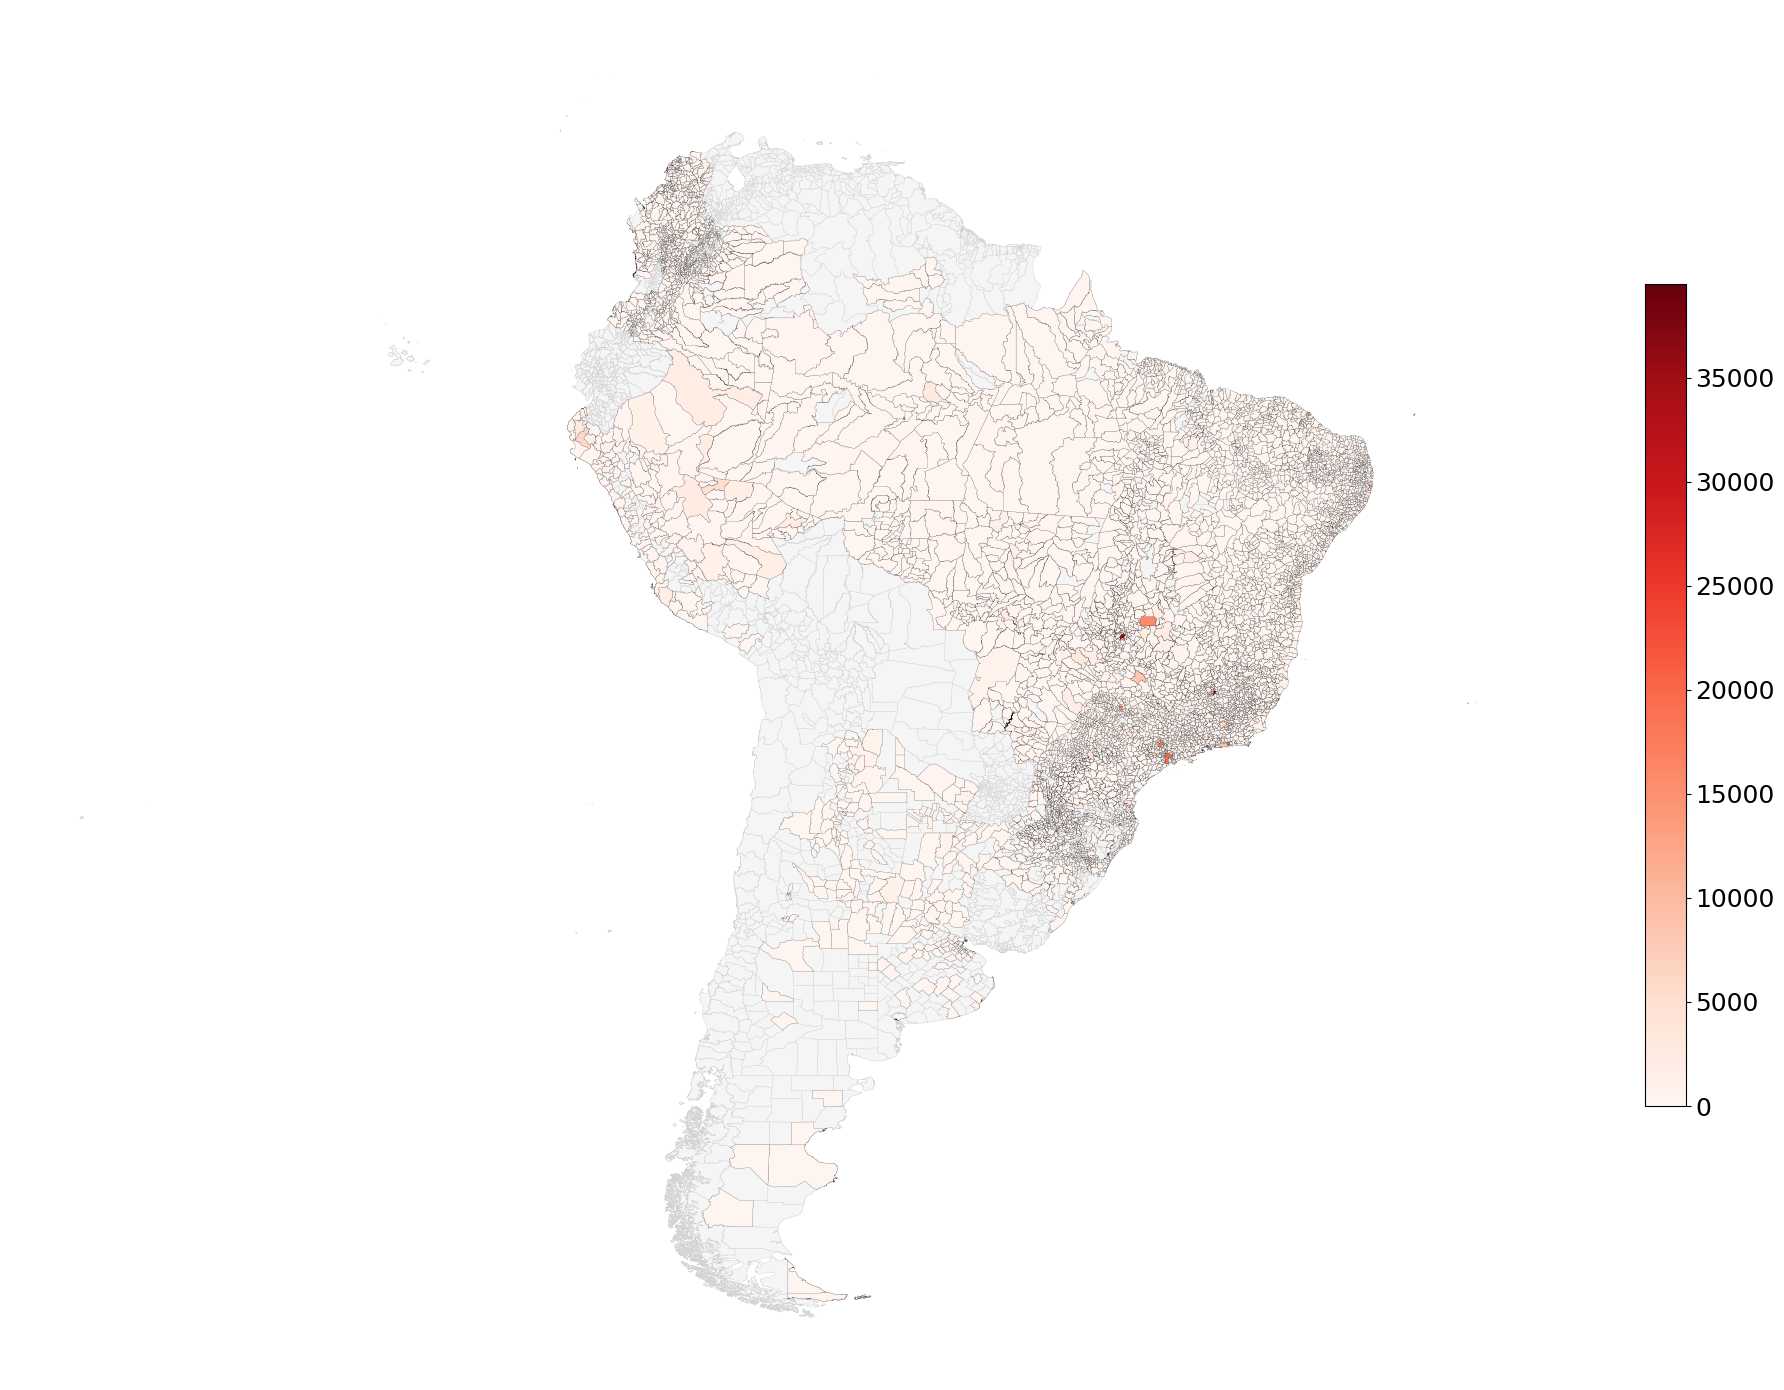

In [ ]:
plot_global_dengue_choropleth(dengue_merged_gdf, gadm_subset)

In [ ]:
# def show_gadm_municipalities(country, region=None):
#     # Clean inputs to match standardized lowercase values
#     country = country.strip().lower()
#     if region:
#         region = region.strip().lower()

#     # Filter the GADM subset
#     filtered = gadm_subset[
#         (gadm_subset["adm_0_name"].str.lower() == country)
#         & (gadm_subset["adm_1_name"].str.lower() == region if region else True)
#     ]

#     # Display unique municipalities
#     muni_list = sorted(filtered["adm_2_name"].dropna().unique())

#     print(f"\n📍 Municipalities in {region.title() if region else '[All Regions]'}, {country.title()}:")
#     for name in muni_list:
#         print(f"  - {name}")

#     return muni_list
# show_gadm_municipalities("costa rica", "San Jose")